In [2]:
# Import the library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import datasets, linear_model, metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

In [3]:
# Import the 'drive' module from the 'google.colab' library to mount Google Drive
from google.colab import drive

# Mount the Google Drive to the '/content/drive' directory
drive.mount('/content/drive')


Mounted at /content/drive


In [5]:
# Set the display option to show all columns when printing DataFrames
pd.set_option("display.max_columns", None)


In [6]:
# Read an Excel file located at the specified path and load it into a DataFrame named 'df'
df = pd.read_excel("/content/drive/MyDrive/Proco Project/final_table_clean(1).xlsx")

# Display the contents of the DataFrame 'df'
df


,Name,Speciality,Degree,Year_of_experience,Location,City,dp_score,npv,consultation_fee,Link,Degree(1),Degree(2)
0,Dr. Sunil Kumar S,Cardiologist,"MBBS, MD - General Medicine, DM - Cardiology, ...",19.0,"Hebbal, Bangalore",Bangalore,1,46,1000,https://www.practo.com/bangalore/doctor/dr-sun...,MBBS,"MD - General Medicine, DM - Cardiology, Fello..."
1,Dr. Ranjan Shetty,Cardiologist,"MBBS, MD - Medicine, DM - Cardiology",21.0,"Old Airport Road, Bangalore",Bangalore,91,89,1100,https://www.practo.com/bangalore/doctor/dr-ran...,MBBS,"MD - Medicine, DM - Cardiology"
2,Dr. R.S. Venkatesulu,Cardiologist,"MBBS, MD - General Medicine, DM - Cardiology",20.0,"Hebbal, Bangalore",Bangalore,67,12,1000,https://www.practo.com/bangalore/doctor/r-s-ve...,MBBS,"MD - General Medicine, DM - Cardiology"
3,Dr. Prabhakar C Koregol,Cardiologist,"DM - Cardiology, MD - General Medicine, MBBS",24.0,"Malleswaram, Bangalore",Bangalore,97,1601,700,https://www.practo.com/bangalore/doctor/dr-pra...,DM - Cardiology,"MD - General Medicine, MBBS"
4,Dr. Balaraju D,Cardiologist,"MD - General Medicine, DNB - Cardiology, MBBS",13.0,"Jayanagar 9 Block, Bangalore",Bangalore,97,1601,750,https://www.practo.com/bangalore/doctor/dr-bal...,MD - General Medicine,"DNB - Cardiology, MBBS"
...,...,...,...,...,...,...,...,...,...,...,...,...
5753,Dr. Ramen Goel,Bariatric,"MBBS, MS - General Surgery",37.0,"Chembur, Mumbai",Mumbai,96,26,1500,https://www.practo.com/mumbai/doctor/obesity-c...,MBBS,MS - General Surgery
5754,Dr. Manish Motwani,Bariatric,"MBBS, MS - General Surgery",27.0,"Mulund West, Mumbai",Mumbai,89,18,1000,https://www.practo.com/mumbai/doctor/dr-manish...,MBBS,MS - General Surgery
5755,Dr. Vishal Diddi,Bariatric,"MBBS, DNB - General Surgery, FCPS - General Su...",17.0,"Borivali West, Mumbai",Mumbai,1,46,700,https://www.practo.com/mumbai/doctor/vishal-di...,MBBS,"DNB - General Surgery, FCPS - General Surgery"
5756,Dr. Hemal Bhagat,Bariatric,"MBBS, DNB - General Surgery, Diploma in Laparo...",29.0,"Andheri West, Mumbai",Mumbai,98,1203,2000,https://www.practo.com/mumbai/doctor/dr-hemal-...,MBBS,"DNB - General Surgery, Diploma in Laparoscopy"


In [7]:
# Split the 'Location' column values by the last occurrence of whitespace and keep only the first part
df['Location'] = df['Location'].str.rsplit(n=1).str[0]

In [8]:
df.iloc[:,4]

0                  Hebbal,
1        Old Airport Road,
2                  Hebbal,
3             Malleswaram,
4       Jayanagar 9 Block,
               ...        
5753              Chembur,
5754          Mulund West,
5755        Borivali West,
5756         Andheri West,
5757           Malad West,
Name: Location, Length: 5758, dtype: object

In [9]:
df.head()

,Name,Speciality,Degree,Year_of_experience,Location,City,dp_score,npv,consultation_fee,Link,Degree(1),Degree(2)
0,Dr. Sunil Kumar S,Cardiologist,"MBBS, MD - General Medicine, DM - Cardiology, ...",19.0,"Hebbal,",Bangalore,1,46,1000,https://www.practo.com/bangalore/doctor/dr-sun...,MBBS,"MD - General Medicine, DM - Cardiology, Fello..."
1,Dr. Ranjan Shetty,Cardiologist,"MBBS, MD - Medicine, DM - Cardiology",21.0,"Old Airport Road,",Bangalore,91,89,1100,https://www.practo.com/bangalore/doctor/dr-ran...,MBBS,"MD - Medicine, DM - Cardiology"
2,Dr. R.S. Venkatesulu,Cardiologist,"MBBS, MD - General Medicine, DM - Cardiology",20.0,"Hebbal,",Bangalore,67,12,1000,https://www.practo.com/bangalore/doctor/r-s-ve...,MBBS,"MD - General Medicine, DM - Cardiology"
3,Dr. Prabhakar C Koregol,Cardiologist,"DM - Cardiology, MD - General Medicine, MBBS",24.0,"Malleswaram,",Bangalore,97,1601,700,https://www.practo.com/bangalore/doctor/dr-pra...,DM - Cardiology,"MD - General Medicine, MBBS"
4,Dr. Balaraju D,Cardiologist,"MD - General Medicine, DNB - Cardiology, MBBS",13.0,"Jayanagar 9 Block,",Bangalore,97,1601,750,https://www.practo.com/bangalore/doctor/dr-bal...,MD - General Medicine,"DNB - Cardiology, MBBS"


In [10]:
df = df.drop([ 'Name'], axis = 1)

In [11]:
df[df['Degree'].isnull()]

,Speciality,Degree,Year_of_experience,Location,City,dp_score,npv,consultation_fee,Link,Degree(1),Degree(2)


In [12]:
df.isnull().sum()

Speciality              0
Degree                  0
Year_of_experience      2
Location                0
City                    0
dp_score                0
npv                     0
consultation_fee        0
Link                    0
Degree(1)               0
Degree(2)             809
dtype: int64

In [13]:
df.columns

Index(['Speciality', 'Degree', 'Year_of_experience', 'Location', 'City',
       'dp_score', 'npv', 'consultation_fee', 'Link', 'Degree(1)',
       'Degree(2)'],
      dtype='object')

In [14]:
df.dropna(inplace=True)

In [15]:
df['Degree'].unique()

array(['MBBS, MD - General Medicine, DM - Cardiology, Fellowship In Interventional  Cardiology',
       'MBBS, MD - Medicine, DM - Cardiology',
       'MBBS, MD - General Medicine, DM - Cardiology',
       'DM - Cardiology, MD - General Medicine, MBBS',
       'MD - General Medicine, DNB - Cardiology, MBBS',
       'MBBS, DNB - General Medicine, DM - Cardiology',
       'MBBS, MD - General Medicine, DNB - Cardiology',
       'MBBS, MS - General Surgery, MCh - Cardio Thoracic Surgery',
       'DM - Cardiology, MBBS',
       'MBBS, DNB - General Medicine, DNB - Cardiology',
       'MBBS, DM - Cardiology, MD - General Medicine',
       'MBBS, MD - General Medicine, DNB - Cardiology, MNAMS - Cardiology',
       'MBBS, DNB - Cardiothoracic Surgery',
       'MBBS, PhD - Cardiology, MRCP (UK)', 'MBBS, DM - Cardiology',
       'MBBS, MD - General Medicine, DM - Cardiology, DNB - Cardiology',
       'MBBS, MD - Pediatrics, DNB - Paediatrics, DM - Cardiology',
       'MD - Medicine, DM - Cardiol

In [16]:
# Replace patterns matching '- [A-Za-z\s]+' with an empty string in the 'Degree' column
df['Degree'] = df['Degree'].str.replace(r'- [A-Za-z\s]+', '', regex=True)


In [17]:
# Replace patterns matching '\(.*?\)' with an empty string in the 'Degree' column
df['Degree'] = df['Degree'].str.replace(r'\(.*?\)', '', regex=True)

In [18]:
df['Degree'].unique()

array(['MBBS, MD , DM , Fellowship In Interventional  Cardiology',
       'MBBS, MD , DM ', 'DM , MD , MBBS', 'MD , DNB , MBBS',
       'MBBS, DNB , DM ', 'MBBS, MD , DNB ', 'MBBS, MS , MCh ',
       'DM , MBBS', 'MBBS, DNB , DNB ', 'MBBS, DM , MD ',
       'MBBS, MD , DNB , MNAMS ', 'MBBS, DNB ', 'MBBS, PhD , MRCP ',
       'MBBS, DM ', 'MBBS, MD , DM , DNB ', 'MBBS, MD , DNB , DM ',
       'MD , DM , MBBS', 'MBBS, DM , DNB , MD ',
       'MBBS, DNB , MRCP , DNB ', 'MBBS, MD , Diploma in Cardiology',
       'MBBS, MD , FACC, Diploma in Tuberculosis and Chest Diseases ',
       'MD , MBBS, DM ', 'MD , MBBS, DNB ', 'MBBS, MD , DM ,  FRCP',
       'DM , MD , DNB , MBBS', 'MBBS, DNB , DM , FACC',
       'MBBS, MD , DNB , Fellowship In Interventional  Cardiology',
       'MBBS, MD , DM , FACC', 'MBBS, MD , DNB , FNB ',
       'MBBS, MD , DM , MNAMS ',
       'MBBS, Diplomate of American Board of Internal Medicine , Diplomate in Cardiovascular Disease, Diplomate in Interventional Cardiology

In [ ]:
#df['Degree'] = df['Degree'].str.replace(r' & .*', '', regex=True)

## Removing Extra Character for Diploma Degree


In [19]:
# Initialize an empty list to store modified 'Degree' values
output_list = []

# Loop over each row in the DataFrame 'df'
for i in range(len(df["Degree"])):
    # Split the 'Degree' value into a list using comma as a separator
    l = df.iloc[i, 1].split(",")
    
    # Display the index and the split list for debugging
    print(i, l)
    
    # Loop over each element in the split list
    for j in range(len(l)):
        # Modify specific keywords in each element
        if 'Diploma' in l[j]:
            l[j] = 'Diploma'
        elif 'fellow' in l[j].strip().lower() or 'fellowship' in l[j].strip().lower() or 'certificate' in l[j].strip().lower() or 'certification' in l[j].strip().lower() or 'training' in l[j].strip().lower() or 'member' in l[j].strip().lower() or 'american' in l[j].strip().lower():
            l[j] = ""
        elif '&' in l[j]:
            l[j] = l[j].split("&")[0].strip()
        elif "/" in l[j]:
            l[j] = l[j].split("/")[0].strip()
        elif len(l[j]) > 15:
            l[j] = ""
    
    # Remove empty elements and join the modified list back into a string
    l = [elem.strip() for elem in l if elem]
    s = ",".join(l)
    
    # Append the modified string to the output_list
    output_list.append(s)
    
    # Display the index and the modified list for debugging
    print(i, l)

# Update the 'Degree' column with the modified values from the output_list
df["Degree"] = output_list


Streaming output truncated to the last 5000 lines.
2448 ['MS ', ' MBBS']
2448 ['MS', 'MBBS']
2449 ['MBBS', ' DNB /Orthopedic Surgery', ' Diploma in Orthopaedics']
2449 ['MBBS', 'DNB', 'Diploma']
2450 ['MBBS', ' MS ']
2450 ['MBBS', 'MS']
2451 ['MBBS', ' DNB /Orthopedic Surgery']
2451 ['MBBS', 'DNB']
2452 ['MBBS', ' DNB /Orthopedic Surgery']
2452 ['MBBS', 'DNB']
2453 ['MBBS', ' MS ', ' DNB /Orthopedic Surgery']
2453 ['MBBS', 'MS', 'DNB']
2454 ['MBBS', ' MS ', ' M.Ch ', ' FRCS ']
2454 ['MBBS', 'MS', 'M.Ch', 'FRCS']
2455 ['MBBS', ' Diploma in Orthopaedics', ' MS ']
2455 ['MBBS', 'Diploma', 'MS']
2456 ['MBBS', ' MS ']
2456 ['MBBS', 'MS']
2457 ['MBBS', ' MS ']
2457 ['MBBS', 'MS']
2458 ['MS ', ' MBBS']
2458 ['MS', 'MBBS']
2459 ['MBBS', ' MS ']
2459 ['MBBS', 'MS']
2460 ['MBBS', ' MS ', ' DNB /Orthopedic Surgery', ' MRCS ']
2460 ['MBBS', 'MS', 'DNB', 'MRCS']
2461 ['MBBS', ' DNB /Orthopedic Surgery']
2461 ['MBBS', 'DNB']
2462 ['MBBS', ' MS ']
2462 ['MBBS', 'MS']
2463 ['MBBS', ' MS ']
2463 ['MBBS

In [ ]:
# df['Degree'] = df['Degree'].str.replace(r'^-.*,$', '', regex=True)

In [20]:
len(df[df.duplicated()])

21

## Removing Duplicates

In [21]:
df.drop_duplicates()

,Speciality,Degree,Year_of_experience,Location,City,dp_score,npv,consultation_fee,Link,Degree(1),Degree(2)
0,Cardiologist,"MBBS,MD,DM",19.0,"Hebbal,",Bangalore,1,46,1000,https://www.practo.com/bangalore/doctor/dr-sun...,MBBS,"MD - General Medicine, DM - Cardiology, Fello..."
1,Cardiologist,"MBBS,MD,DM",21.0,"Old Airport Road,",Bangalore,91,89,1100,https://www.practo.com/bangalore/doctor/dr-ran...,MBBS,"MD - Medicine, DM - Cardiology"
2,Cardiologist,"MBBS,MD,DM",20.0,"Hebbal,",Bangalore,67,12,1000,https://www.practo.com/bangalore/doctor/r-s-ve...,MBBS,"MD - General Medicine, DM - Cardiology"
3,Cardiologist,"DM,MD,MBBS",24.0,"Malleswaram,",Bangalore,97,1601,700,https://www.practo.com/bangalore/doctor/dr-pra...,DM - Cardiology,"MD - General Medicine, MBBS"
4,Cardiologist,"MD,DNB,MBBS",13.0,"Jayanagar 9 Block,",Bangalore,97,1601,750,https://www.practo.com/bangalore/doctor/dr-bal...,MD - General Medicine,"DNB - Cardiology, MBBS"
...,...,...,...,...,...,...,...,...,...,...,...
5753,Bariatric,"MBBS,MS",37.0,"Chembur,",Mumbai,96,26,1500,https://www.practo.com/mumbai/doctor/obesity-c...,MBBS,MS - General Surgery
5754,Bariatric,"MBBS,MS",27.0,"Mulund West,",Mumbai,89,18,1000,https://www.practo.com/mumbai/doctor/dr-manish...,MBBS,MS - General Surgery
5755,Bariatric,"MBBS,DNB,FCPS",17.0,"Borivali West,",Mumbai,1,46,700,https://www.practo.com/mumbai/doctor/vishal-di...,MBBS,"DNB - General Surgery, FCPS - General Surgery"
5756,Bariatric,"MBBS,DNB,Diploma",29.0,"Andheri West,",Mumbai,98,1203,2000,https://www.practo.com/mumbai/doctor/dr-hemal-...,MBBS,"DNB - General Surgery, Diploma in Laparoscopy"


In [22]:
#Dropping duplicate 
df = df.drop_duplicates()

In [23]:
df.shape

(4927, 11)

In [24]:
# Define a function named 'split1' to extract unique degree values from the 'Degree' column
def split1():
    # Initialize an empty set to store unique degree values
    s = set()
    
    # Loop over each element in the 'Degree' column of the DataFrame 'df'
    for i in df['Degree']:
        # Split the current element using comma as a separator
        for j in i.split(','):
            # Add the split degree value to the set
            s.add(j)
    
    # Return the set containing unique degree values
    return s


In [25]:
split1()

{'B.Sc',
 'B.Sc.',
 'BAMS',
 'BDS',
 'BHMS',
 'BNYS',
 'BPTh',
 'BSc',
 'BSc.',
 'CCST',
 'CCT',
 'DAA',
 'DDV',
 'DDVL',
 'DGO',
 'DHMS',
 'DICOI',
 'DM',
 'DMD',
 'DNB',
 'DNHE',
 'DO',
 'DOMS',
 'DPM',
 'DVD',
 'Diploma',
 'FACC',
 'FAICO',
 'FCCM',
 'FCCP',
 'FCPS',
 'FCPS .',
 'FDSRCS',
 'FFDRCSI',
 'FICOI',
 'FICS',
 'FNB',
 'FRACP',
 'FRCOG',
 'FRCP',
 'FRCPCH',
 'FRCS',
 'M.Ch',
 'M.D.',
 'M.Sc',
 'M.Sc.',
 'MBBS',
 'MCh',
 'MD',
 'MD -',
 'MD / MS',
 'MDS',
 'MFDS RCS',
 'MFGDP',
 'MICOI',
 'MNAMS',
 'MOrth',
 'MPTh',
 'MPhil.',
 'MRCOG',
 'MRCP',
 'MRCPsych',
 'MRCS',
 'MS',
 'MSc',
 'MSc.',
 'ND',
 'P.G in Sports Science Fitness',
 'PGCC',
 'PGCE',
 'PGDE',
 'Ph.D.',
 'PhD',
 'VD',
 'Venereology'}

In [ ]:
# Not_needed=['Fellow in Spine Surgery',Fellowship in Neurological Rehabilitation]

In [26]:
c = 0
l = []
for i in split1():
    if len(i)>5:
        c = c+1
        print(i, len(i))
print(c)

MPhil. 6
FRCPCH 6
MRCPsych 8
Diploma 7
MFDS RCS 8
FDSRCS 6
Venereology 11
MD / MS 7
P.G in Sports Science Fitness 29
FFDRCSI 7
FCPS . 6
11


In [27]:
df['Degree'].unique()

array(['MBBS,MD,DM', 'DM,MD,MBBS', 'MD,DNB,MBBS', 'MBBS,DNB,DM',
       'MBBS,MD,DNB', 'MBBS,MS,MCh', 'DM,MBBS', 'MBBS,DNB,DNB',
       'MBBS,DM,MD', 'MBBS,MD,DNB,MNAMS', 'MBBS,DNB', 'MBBS,PhD,MRCP',
       'MBBS,DM', 'MBBS,MD,DM,DNB', 'MBBS,MD,DNB,DM', 'MD,DM,MBBS',
       'MBBS,DM,DNB,MD', 'MBBS,DNB,MRCP,DNB', 'MBBS,MD,Diploma',
       'MBBS,MD,FACC,Diploma', 'MD,MBBS,DM', 'MD,MBBS,DNB',
       'MBBS,MD,DM,FRCP', 'DM,MD,DNB,MBBS', 'MBBS,DNB,DM,FACC',
       'MBBS,MD,DM,FACC', 'MBBS,MD,DNB,FNB', 'MBBS,MD,DM,MNAMS',
       'MBBS,Diploma,Diploma,Diploma,Diploma', 'MBBS,Diploma',
       'MBBS,MD,FNB,DM', 'MD,DM', 'DNB,DNB', 'MBBS,MS,DNB,MCh',
       'DM,MBBS,MD', 'BDS,MDS', 'BDS,MICOI', 'BDS,MDS,Diploma', 'MDS,BDS',
       'BDS,Diploma', 'BDS', 'BDS,MDS,FICOI', 'BDS,MDS,MFGDP',
       'BDS,MFDS RCS', 'BDS,MDS,MOrth', 'BDS,MD', 'BDS,FDSRCS,FFDRCSI',
       'MDS,BDS,MOrth', 'BDS,FICOI,MICOI', 'BDS,PhD', 'BDS,MSc,Diploma',
       'BDS,MDS,MRCS', 'BDS,MDS,FDSRCS,FFDRCSI,FDSRCS', 'MDS,BDS,Dip

In [ ]:

# replacements = {'B.Sc.':'B.Sc', 'BSc':'B.Sc','BSc.':'B.Sc','G.I.':'GI', 'M.D.':'MD',
#        'M.Sc.':'M.Sc', 'MCh':'M.Ch','MSc':'M.Sc', 'MSc.':'M.Sc','P.G':'PG', 'P.G.':'PG'}

In [28]:
import re

In [29]:
df['Degree'] = df['Degree'].str.replace('.','')

<ipython-input-29-1fb7c5b4b372>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Degree'] = df['Degree'].str.replace('.','')


In [30]:
split1()

{'BAMS',
 'BDS',
 'BHMS',
 'BNYS',
 'BPTh',
 'BSc',
 'CCST',
 'CCT',
 'DAA',
 'DDV',
 'DDVL',
 'DGO',
 'DHMS',
 'DICOI',
 'DM',
 'DMD',
 'DNB',
 'DNHE',
 'DO',
 'DOMS',
 'DPM',
 'DVD',
 'Diploma',
 'FACC',
 'FAICO',
 'FCCM',
 'FCCP',
 'FCPS',
 'FCPS ',
 'FDSRCS',
 'FFDRCSI',
 'FICOI',
 'FICS',
 'FNB',
 'FRACP',
 'FRCOG',
 'FRCP',
 'FRCPCH',
 'FRCS',
 'MBBS',
 'MCh',
 'MD',
 'MD -',
 'MD / MS',
 'MDS',
 'MFDS RCS',
 'MFGDP',
 'MICOI',
 'MNAMS',
 'MOrth',
 'MPTh',
 'MPhil',
 'MRCOG',
 'MRCP',
 'MRCPsych',
 'MRCS',
 'MS',
 'MSc',
 'ND',
 'PG in Sports Science Fitness',
 'PGCC',
 'PGCE',
 'PGDE',
 'PhD',
 'VD',
 'Venereology'}

In [31]:
df['Degree'] = df['Degree'].str.replace('.','')

<ipython-input-31-1fb7c5b4b372>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Degree'] = df['Degree'].str.replace('.','')


In [32]:
df['Degree'] = df['Degree'].str.replace('PG in Sports Science Fitness','PG')

In [33]:
df['Degree'] = df['Degree'].str.replace('MD / MS','MD')

In [34]:
df['Degree'] = df['Degree'].str.replace('MD -','MD')

In [35]:
df['Degree'] = df['Degree'].str.replace('MD -','MD')

In [36]:
len(split1())

64

In [37]:
df.drop(['Link','Degree(1)','Degree(2)'],axis=1,inplace=True)

In [38]:
df['Degree']

0             MBBS,MD,DM
1             MBBS,MD,DM
2             MBBS,MD,DM
3             DM,MD,MBBS
4            MD,DNB,MBBS
              ...       
5753             MBBS,MS
5754             MBBS,MS
5755       MBBS,DNB,FCPS
5756    MBBS,DNB,Diploma
5757             MBBS,MS
Name: Degree, Length: 4927, dtype: object

In [39]:
df.dtypes

Speciality             object
Degree                 object
Year_of_experience    float64
Location               object
City                   object
dp_score                int64
npv                     int64
consultation_fee        int64
dtype: object

In [40]:
cat = ['City', 'Speciality', 'Degree']

In [41]:
num = ['Year_of_experience', 'dp_score', 'npv']

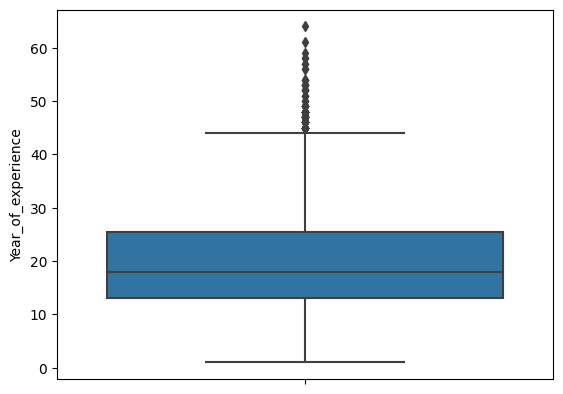

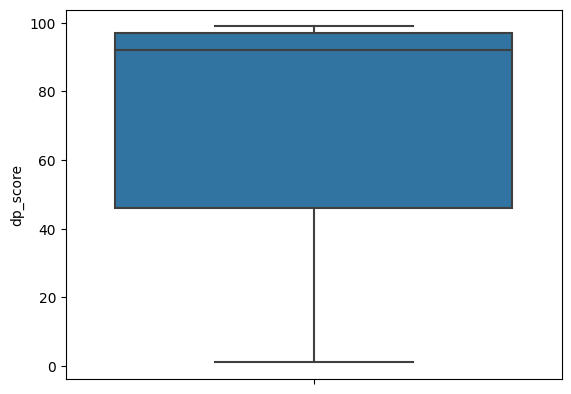

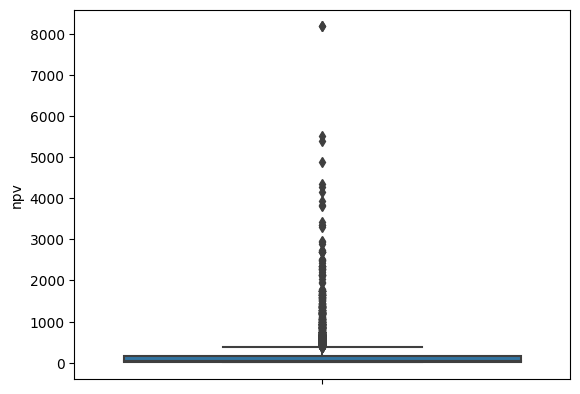

In [42]:
# Loop through each numerical column in the 'num' list
for i in num:
    # Create a new figure for each iteration
    plt.figure()    
    # Create a boxplot using Seaborn with 'y' as the numerical column 'i'
    sns.boxplot(data=df, y=i)    
    # Display the created boxplot
    plt.show()


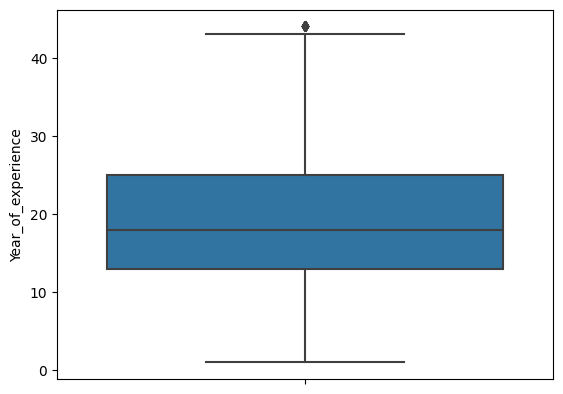

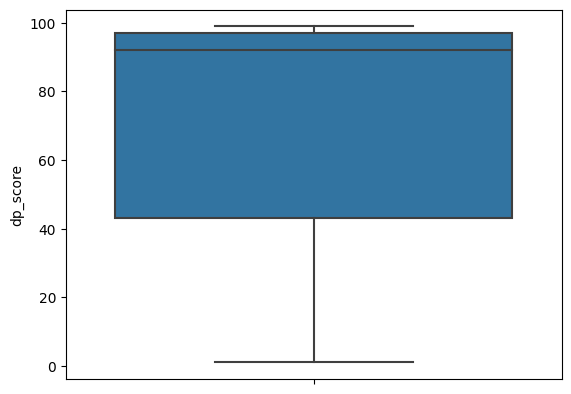

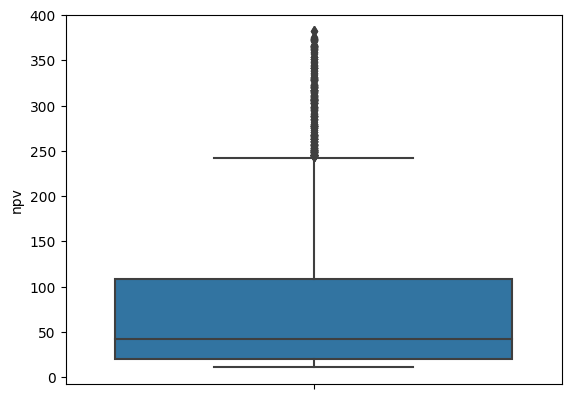

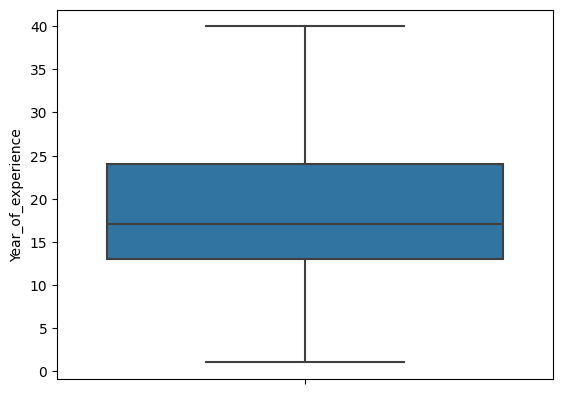

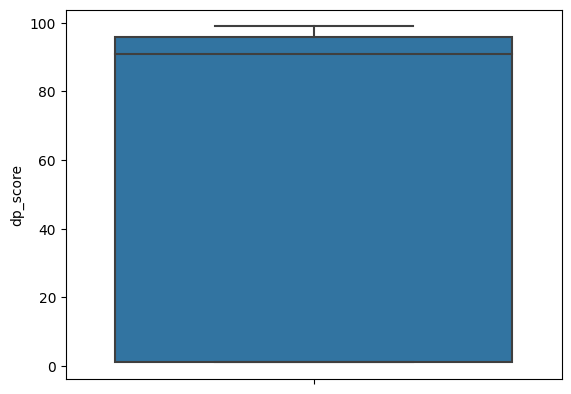

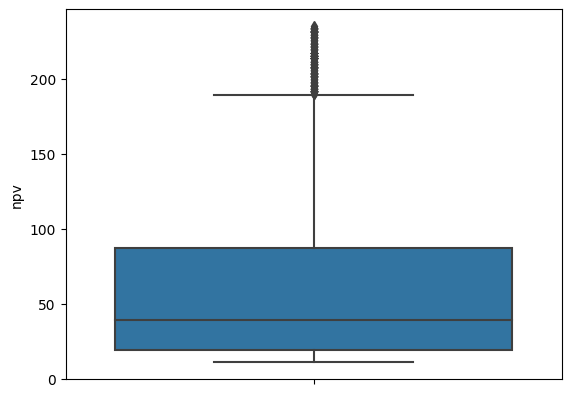

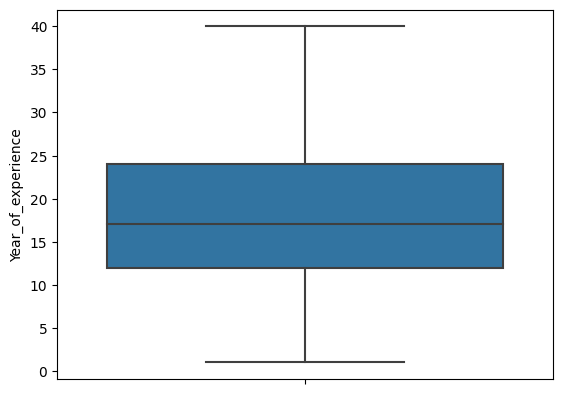

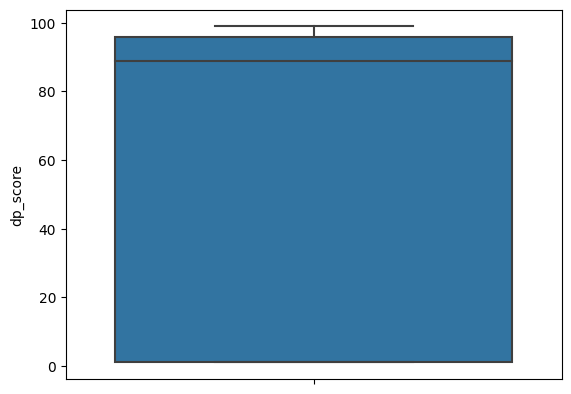

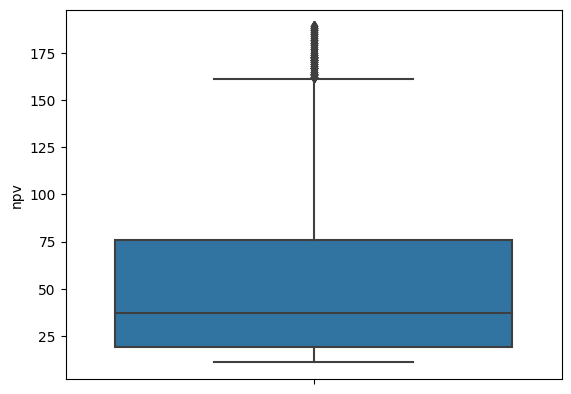

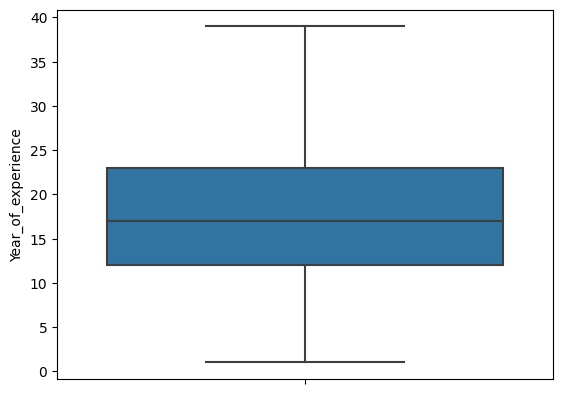

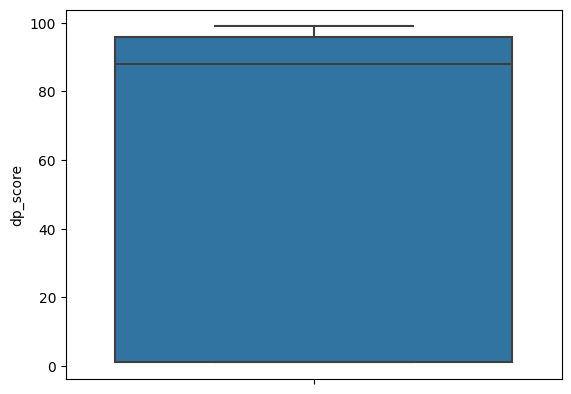

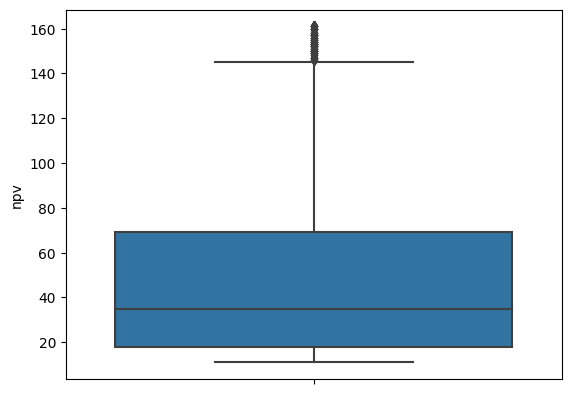

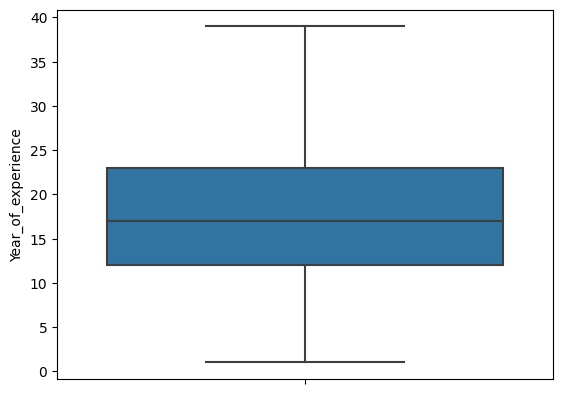

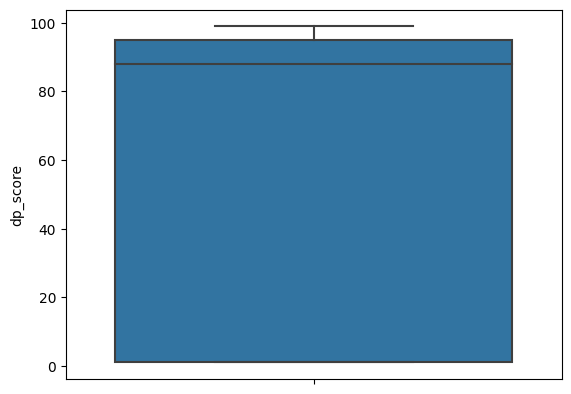

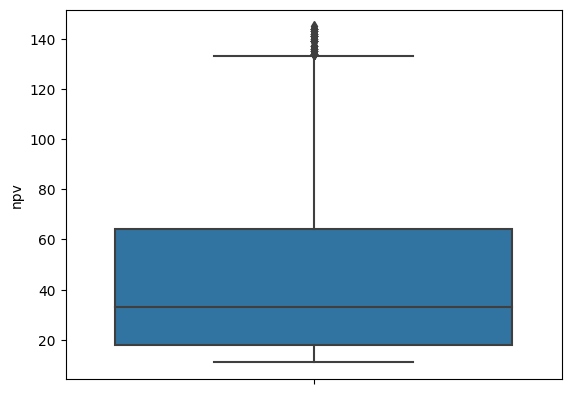

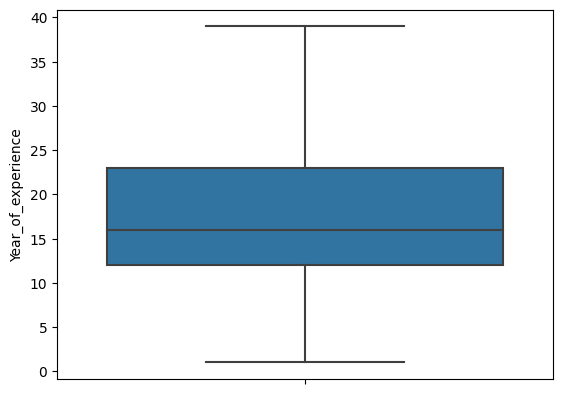

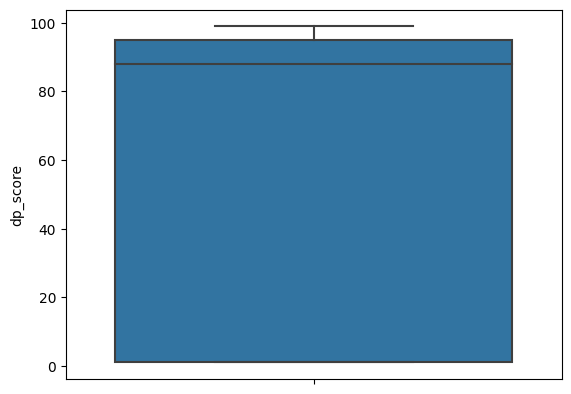

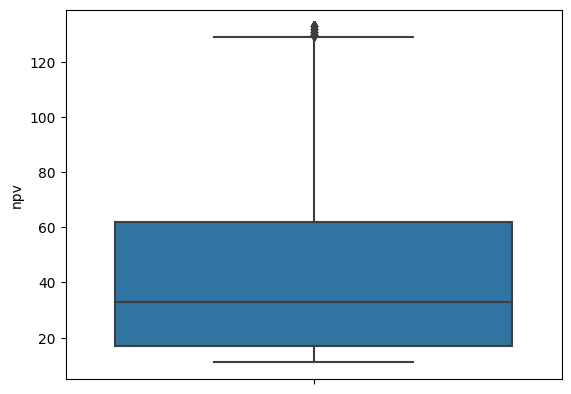

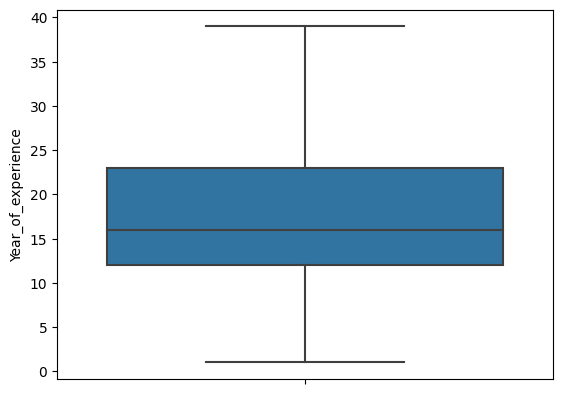

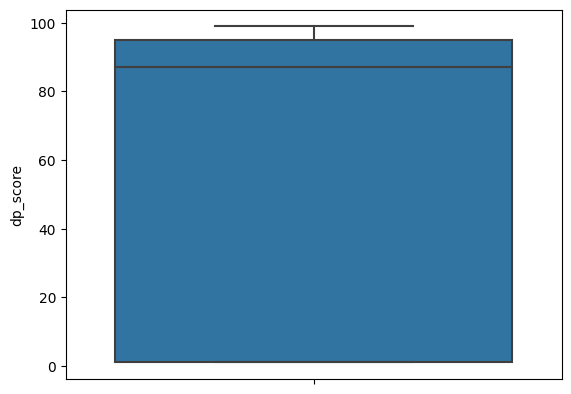

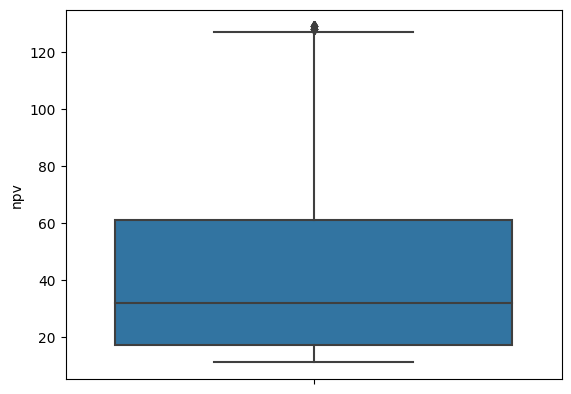

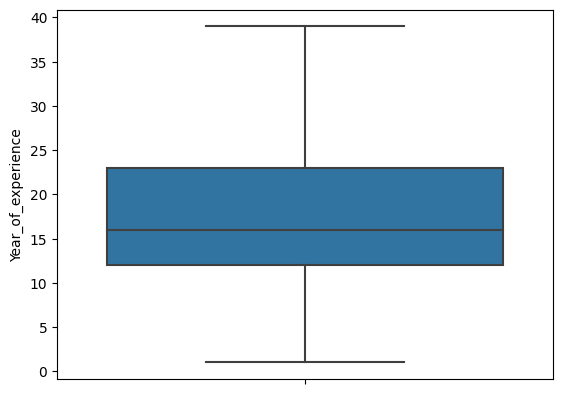

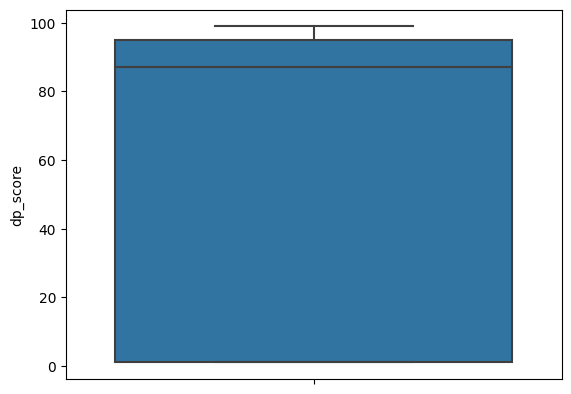

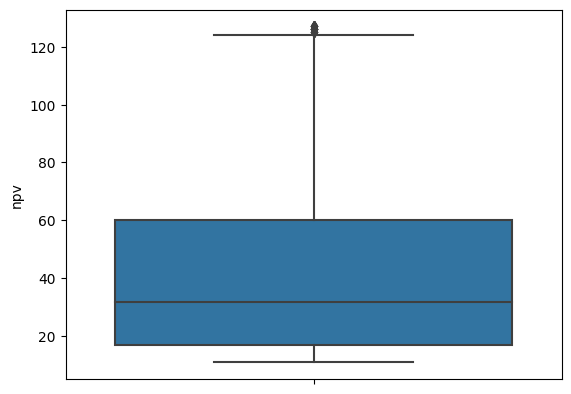

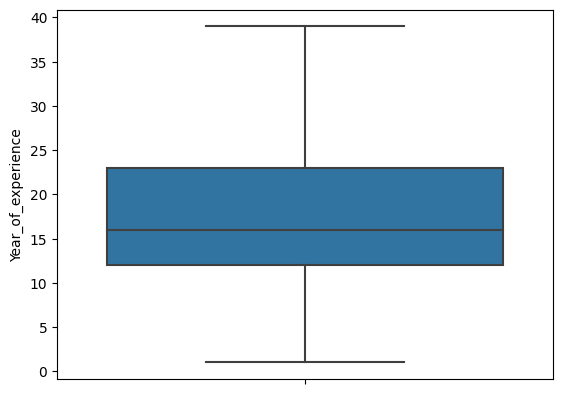

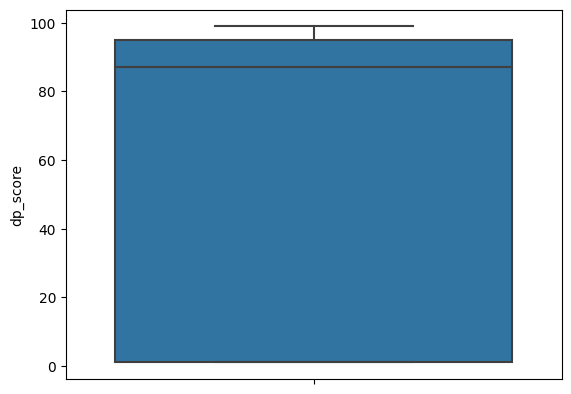

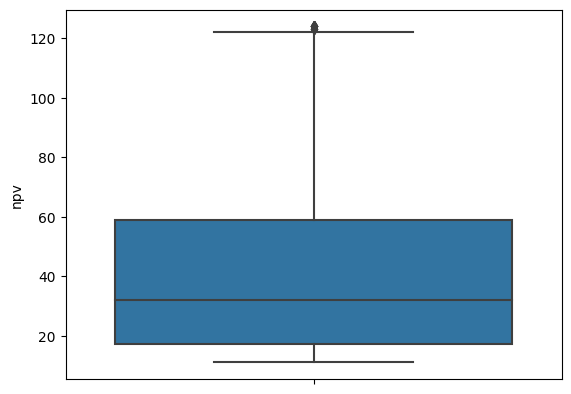

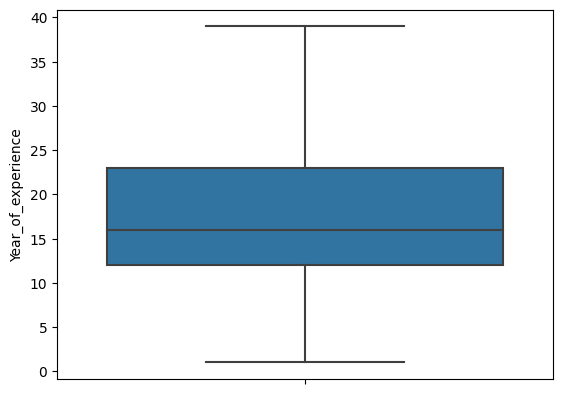

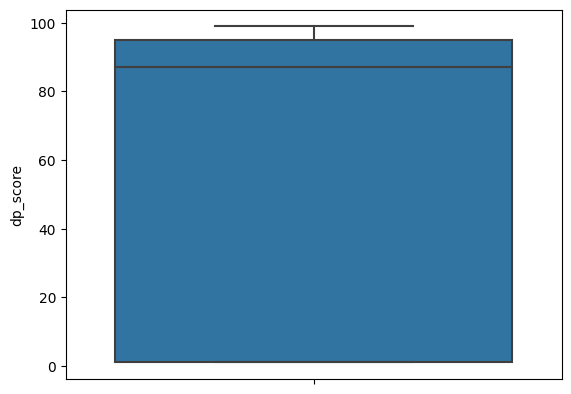

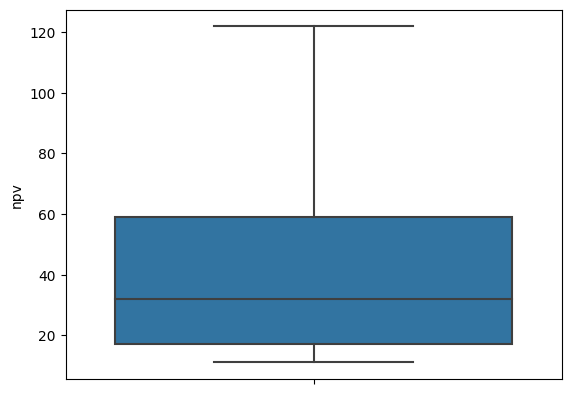

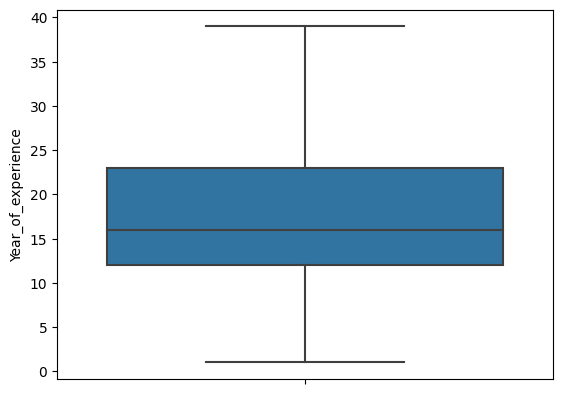

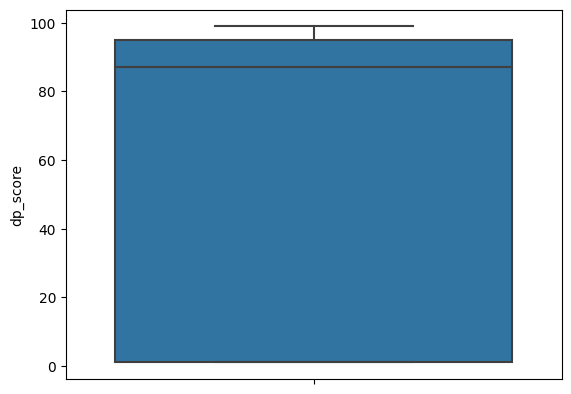

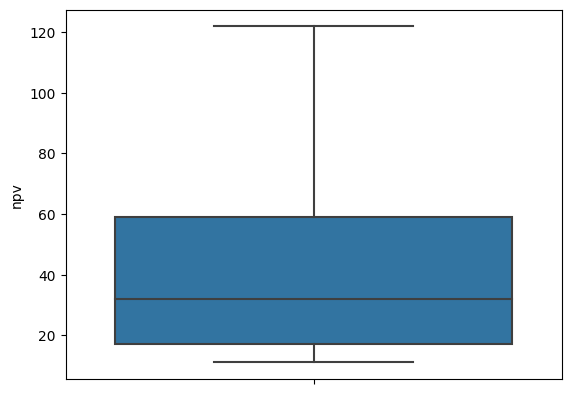

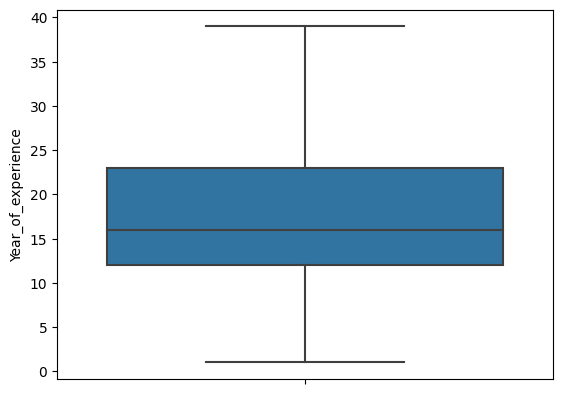

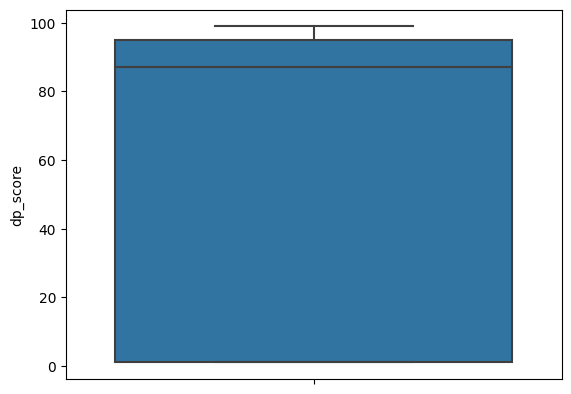

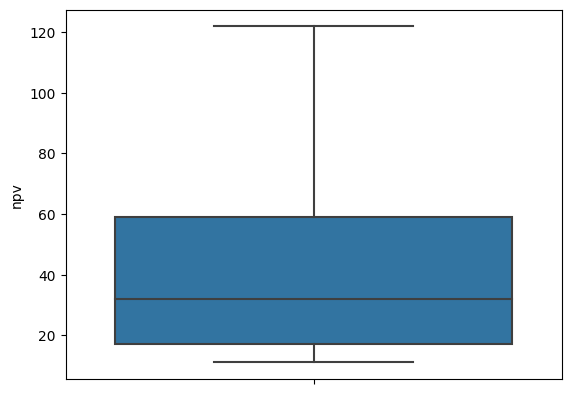

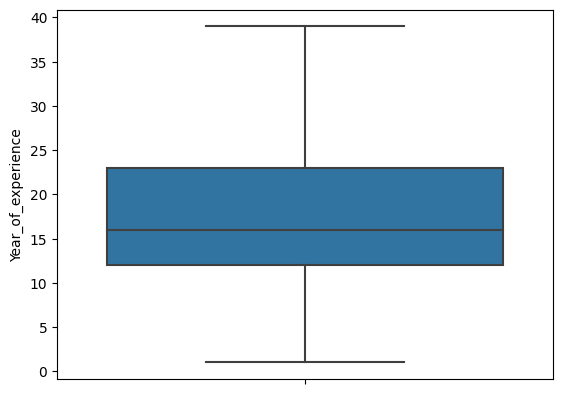

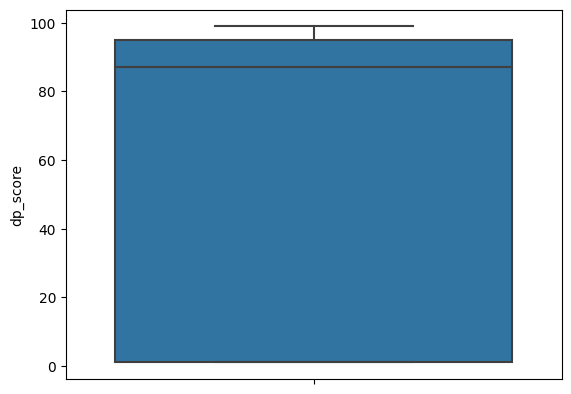

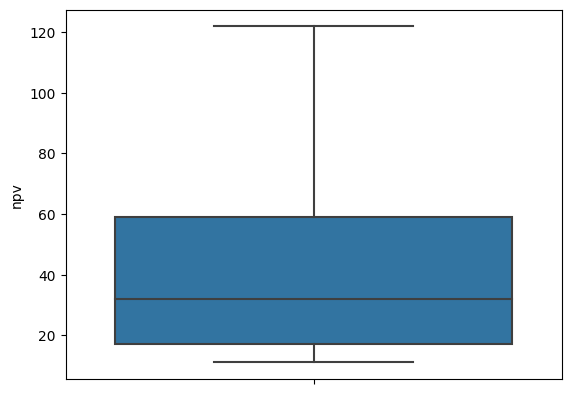

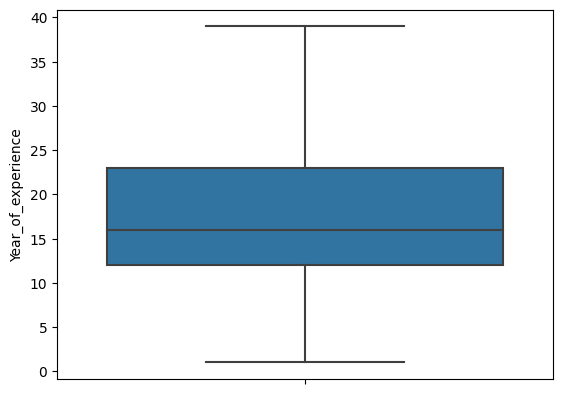

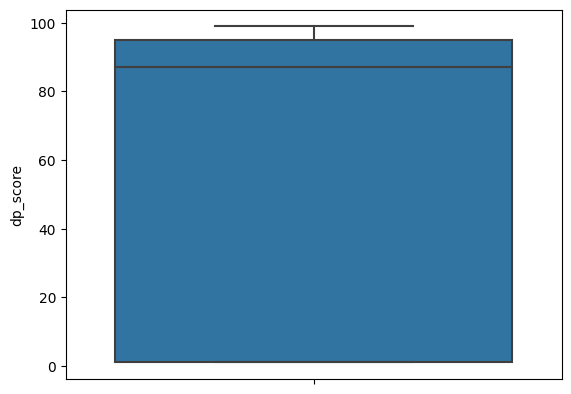

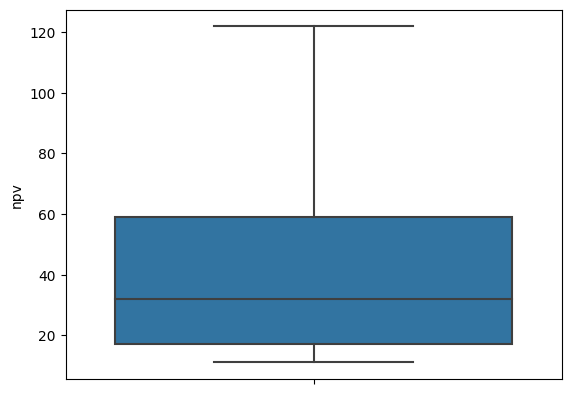

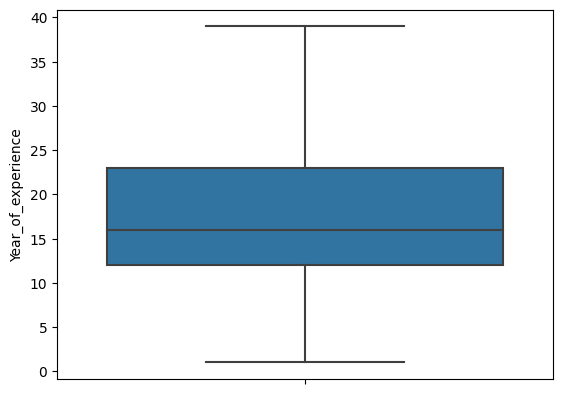

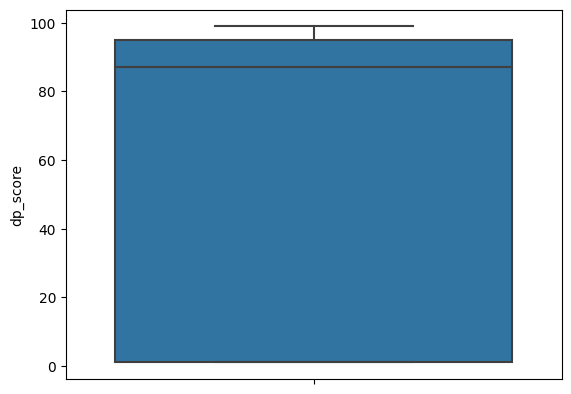

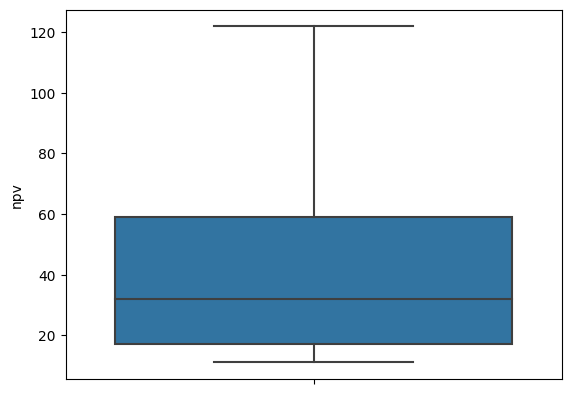

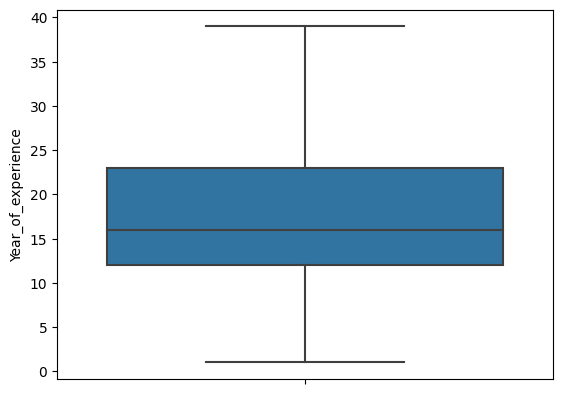

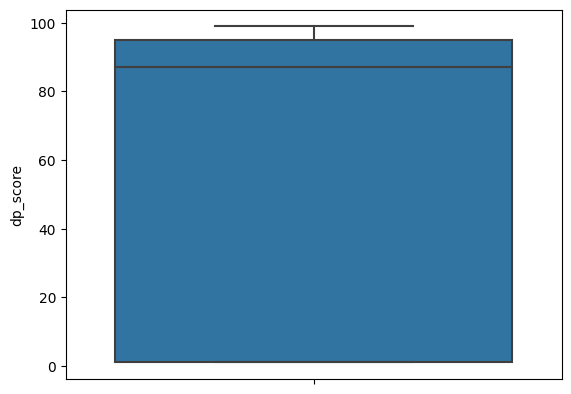

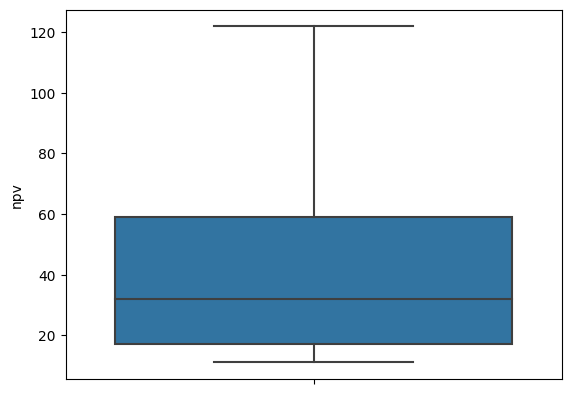

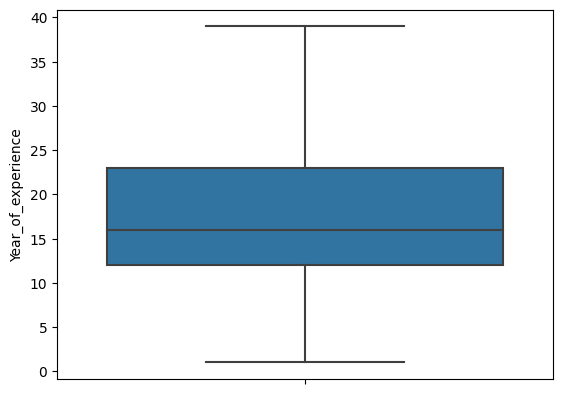

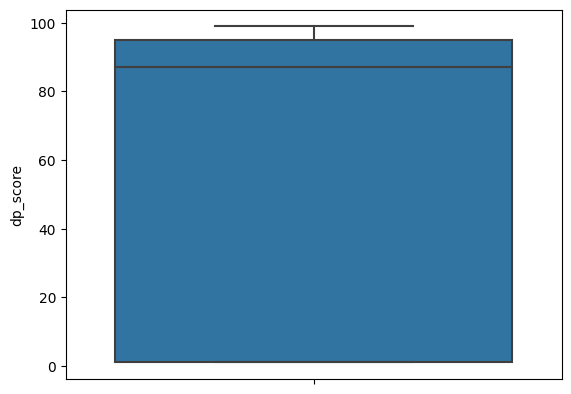

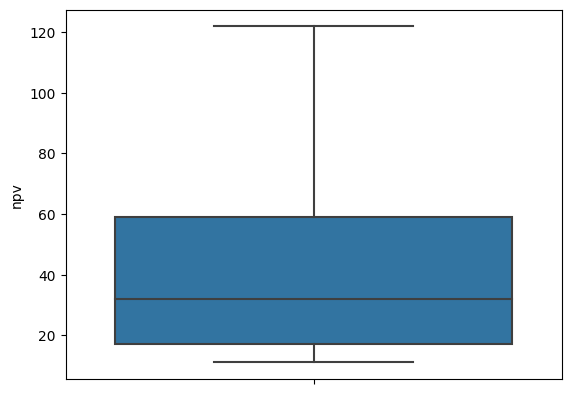

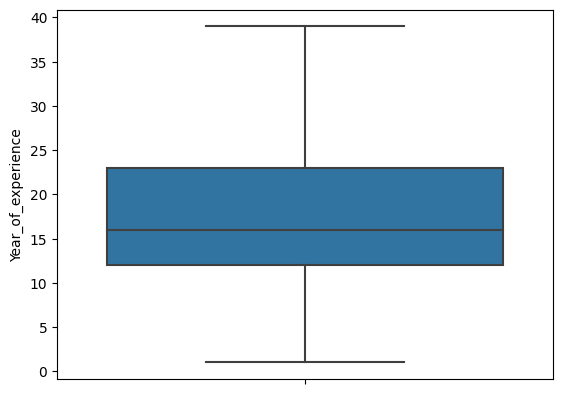

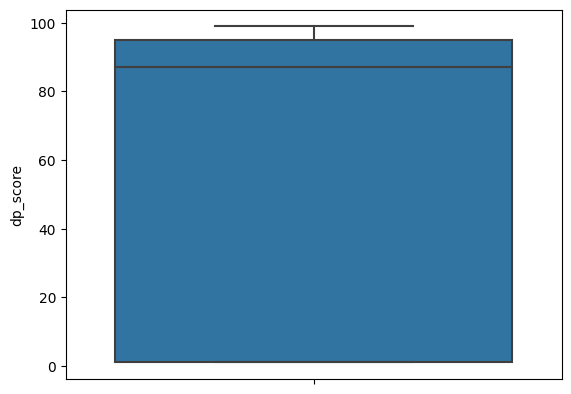

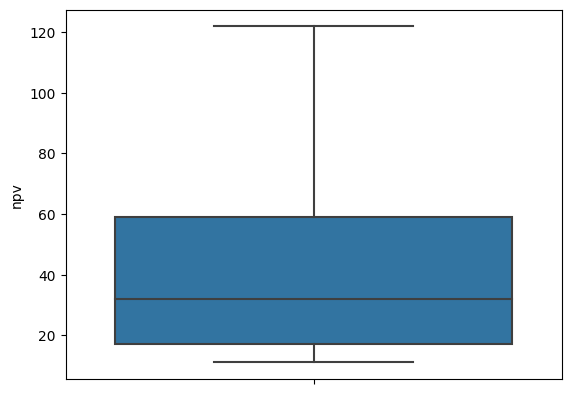

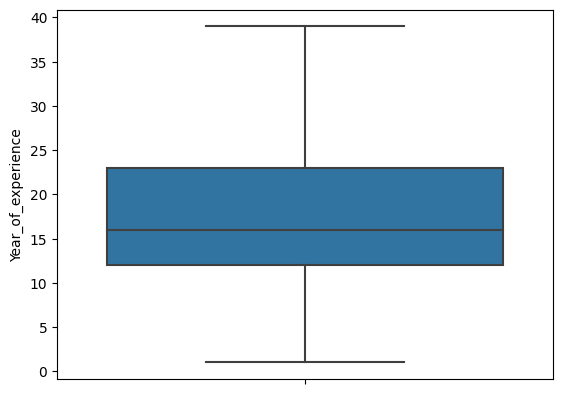

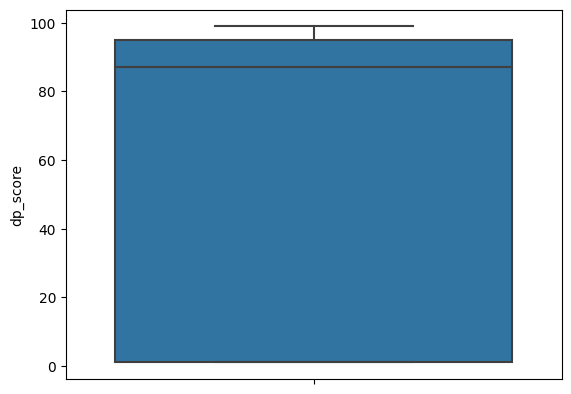

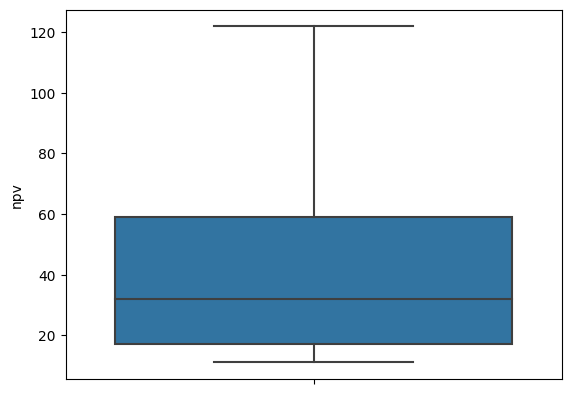

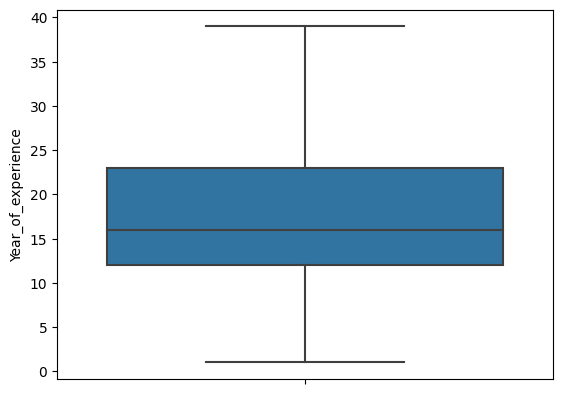

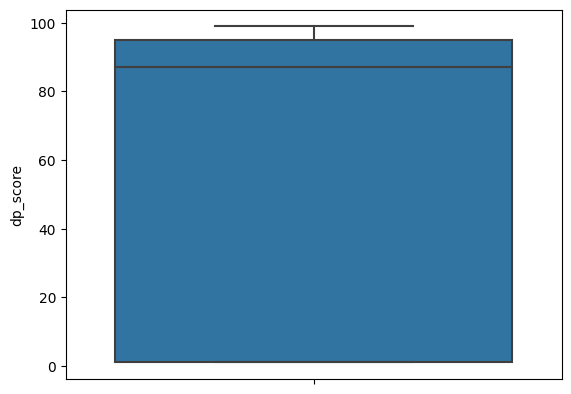

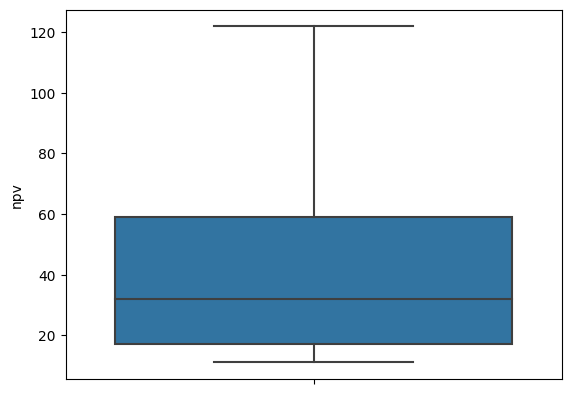

In [43]:
# To remove outliers
k=0
while k<20:

  for i in num:
    q1 = df[i].quantile(0.25)
    q3 = df[i].quantile(0.75)
    iqr = q3 - q1
    ul = q3 + 1.5*iqr
    ll = q1 - 1.5*iqr

    df = df[(df[i] <= ul)&(df[i]>=ll)]
    sns.boxplot(y=i,data=df)
    plt.show()
  k+=1

In [44]:
df.reset_index(drop=True,inplace=True)

In [45]:
df.shape

(3206, 8)

## Encoding Degree Column with One hot Encoding

In [46]:
final_list_of_degrees=list(split1())
final_list_of_degrees

['BDS',
 'FICOI',
 'DDV',
 'DOMS',
 'MOrth',
 'MBBS',
 'FRCPCH',
 'BSc',
 'FAICO',
 'MRCPsych',
 'FCPS',
 'DNHE',
 'PGCE',
 'DVD',
 'BHMS',
 'BAMS',
 'Diploma',
 'DO',
 'FICS',
 'FNB',
 'DGO',
 'MD',
 'MRCOG',
 'DHMS',
 'MSc',
 'MRCS',
 'MPhil',
 'CCT',
 'FRCP',
 'FRCOG',
 'MRCP',
 'CCST',
 'DDVL',
 'MNAMS',
 'MS',
 'BPTh',
 'DNB',
 'Venereology',
 'MPTh',
 'FACC',
 'MDS',
 'FRACP',
 'DPM',
 'PG',
 'DM',
 'PhD',
 'VD',
 'FRCS',
 'FCPS ',
 'MCh',
 'FCCP',
 'DMD']

In [47]:
# Create an empty DataFrame named 'encoded_df' with specified columns
encoded_df = pd.DataFrame(columns=['Speciality', 'Year_of_experience', 'Location', 'City', 'dp_score', 'npv', 'consultation_fee'] + list(final_list_of_degrees))

# Iterate through each row in the original DataFrame 'df'
for index, row in df.iterrows():
    # Create a dictionary 'encoded_row' to store encoded degree information for the current row
    encoded_row = {degree: 1 if degree in row['Degree'] else 0 for degree in final_list_of_degrees}
    
    # Add non-degree-related columns to the 'encoded_row' dictionary
    encoded_row['Speciality'] = row['Speciality']
    encoded_row['Year_of_experience'] = row['Year_of_experience']
    encoded_row['Location'] = row['Location']
    encoded_row['City'] = row['City']
    encoded_row['dp_score'] = row['dp_score']
    encoded_row['npv'] = row['npv']
    encoded_row['consultation_fee'] = row['consultation_fee']
    
    # Append the 'encoded_row' dictionary as a new row to the 'encoded_df' DataFrame
    encoded_df = encoded_df.append(encoded_row, ignore_index=True)


Streaming output truncated to the last 5000 lines.
<ipython-input-47-2d7064ab4e49>:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  encoded_df = encoded_df.append(encoded_row, ignore_index=True)
<ipython-input-47-2d7064ab4e49>:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  encoded_df = encoded_df.append(encoded_row, ignore_index=True)
<ipython-input-47-2d7064ab4e49>:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  encoded_df = encoded_df.append(encoded_row, ignore_index=True)
<ipython-input-47-2d7064ab4e49>:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  encoded_df = encoded_df.append(encoded_row, ignore_index=True)
<ipython-inpu

In [48]:
encoded_df

,Speciality,Year_of_experience,Location,City,dp_score,npv,consultation_fee,BDS,FICOI,DDV,DOMS,MOrth,MBBS,FRCPCH,BSc,FAICO,MRCPsych,FCPS,DNHE,PGCE,DVD,BHMS,BAMS,Diploma,DO,FICS,FNB,DGO,MD,MRCOG,DHMS,MSc,MRCS,MPhil,CCT,FRCP,FRCOG,MRCP,CCST,DDVL,MNAMS,MS,BPTh,DNB,Venereology,MPTh,FACC,MDS,FRACP,DPM,PG,DM,PhD,VD,FRCS,FCPS,MCh,FCCP,DMD
0,Cardiologist,19.0,"Hebbal,",Bangalore,1,46,1000,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,Cardiologist,21.0,"Old Airport Road,",Bangalore,91,89,1100,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2,Cardiologist,20.0,"Hebbal,",Bangalore,67,12,1000,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,Cardiologist,35.0,"Seshadripuram,",Bangalore,91,23,950,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,Cardiologist,7.0,"Whitefield,",Bangalore,91,23,900,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3201,Bariatric,31.0,"Powai,",Mumbai,95,111,1500,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3202,Bariatric,17.0,"Chembur,",Mumbai,94,106,1500,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3203,Bariatric,37.0,"Chembur,",Mumbai,96,26,1500,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3204,Bariatric,27.0,"Mulund West,",Mumbai,89,18,1000,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [49]:
encoded_df_cat=["Speciality",'City','Location']
encoded_df_num=["Year_of_experience","dp_score","npv"]

In [50]:
encoded_df.isnull().sum()

Speciality            0
Year_of_experience    0
Location              0
City                  0
dp_score              0
npv                   0
consultation_fee      0
BDS                   0
FICOI                 0
DDV                   0
DOMS                  0
MOrth                 0
MBBS                  0
FRCPCH                0
BSc                   0
FAICO                 0
MRCPsych              0
FCPS                  0
DNHE                  0
PGCE                  0
DVD                   0
BHMS                  0
BAMS                  0
Diploma               0
DO                    0
FICS                  0
FNB                   0
DGO                   0
MD                    0
MRCOG                 0
DHMS                  0
MSc                   0
MRCS                  0
MPhil                 0
CCT                   0
FRCP                  0
FRCOG                 0
MRCP                  0
CCST                  0
DDVL                  0
MNAMS                 0
MS              

In [ ]:
medical_degrees = [
    'PhD', 'DM', 'MCh', 'MD', 'MS', 'DNB', 'FRACP', 'FRCP', 'FRCOG', 'FCPS',
    'MRCP', 'MDS', 'MBBS', 'BDS', 'MSc', 'MNAMS', 'PG', 'PGD ND', 'MPhil',
    'MFDS RCS', 'MPTh', 'MOrth', 'MRCS', 'MFGDP', 'BAMS', 'BHMS', 'BPTh', 'BSc',
    'BNYS', 'VD', 'DGO', 'DOMS', 'DPM', 'DAA', 'DVD', 'DDVL', 'DDV', 'DICOI',
    'DO', 'CCT', 'CCST', 'Diploma', 'FACC', 'FAICO', 'FCCM', 'FCCP', 'FDSRCS',
    'FFDRCSI', 'FICOI', 'FICS', 'FNB', 'FRCPCH',
    'FRCS', 'PGCC', 'PGCE', 'PGDE',
]


In [ ]:
def highest_degree(x):
    for i in medical_degrees:
        if i in x.split(","):
            return i
            break

In [ ]:
a = 'PhD,MB,MN'

In [ ]:
a.split(',')

['PhD', 'MB', 'MN']

In [ ]:
highest_degree(a)

'PhD'

In [ ]:
df['Degree'].apply(highest_degree)


0        DM
1        DM
2        DM
3        DM
4        MD
       ... 
5753     MS
5754     MS
5755    DNB
5756    DNB
5757     MS
Name: Degree, Length: 4927, dtype: object

In [ ]:
df['Degree'].apply(highest_degree).isnull().sum()

0

In [ ]:
df['Degree'] = df['Degree'].apply(highest_degree)

In [ ]:
df['Degree'].unique()

array(['DM', 'MD', 'MCh', 'DNB', 'PhD', 'MBBS', 'MDS', 'BDS', 'MS',
       'FRCOG', 'DGO', 'MRCP', 'FRCP', 'FCPS', 'MPTh', 'BPTh', 'MSc',
       'BAMS', 'Diploma', 'BSc', 'BHMS', 'PG'], dtype=object)

In [ ]:
# Define the medical degrees in hierarchical order
medical_degrees = [
    'PhD', 'DM', 'MCh', 'MD', 'MS', 'DNB', 'FRACP', 'FRCP', 'FRCOG', 'FCPS',
    'MRCP', 'MDS', 'MBBS', 'BDS', 'MSc', 'MNAMS', 'PG', 'PGD ND', 'MPhil',
    'MFDS RCS', 'MPTh', 'MOrth', 'MRCS', 'MFGDP', 'BAMS', 'BHMS', 'BPTh', 'BSc',
    'BNYS', 'VD', 'DGO', 'DOMS', 'DPM', 'DAA', 'DVD', 'DDVL', 'DDV', 'DICOI',
    'DO', 'CCT', 'CCST', 'Diploma', 'FACC', 'FAICO', 'FCCM', 'FCCP', 'FDSRCS',
    'FFDRCSI', 'FICOI', 'FICS', 'FNB', 'FRCPCH',
    'FRCS', 'PGCC', 'PGCE', 'PGDE',
]

In [ ]:
len(medical_degrees)

56

In [ ]:
# Create a dictionary to map the degrees to their reversed ordinal values
#degree_mapping = {degree: len(medical_degrees) - i for i, degree in enumerate(medical_degrees)}


In [ ]:
#degree_mapping

In [ ]:
#df['Degree_Encoded'] = df['Degree'].map(degree_mapping)

In [ ]:
df.head()

,Speciality,Degree,Year_of_experience,City,dp_score,npv,consultation_fee
0,Cardiologist,DM,19.0,Bangalore,1,46,1000
1,Cardiologist,DM,21.0,Bangalore,91,89,1100
2,Cardiologist,DM,20.0,Bangalore,67,12,1000
3,Cardiologist,DM,24.0,Bangalore,97,1601,700
4,Cardiologist,MD,13.0,Bangalore,97,1601,750


In [ ]:
#df.drop('Degree', axis =1 , inplace = True)

In [ ]:
df.head()

,Speciality,Degree,Year_of_experience,City,dp_score,npv,consultation_fee
0,Cardiologist,DM,19.0,Bangalore,1,46,1000
1,Cardiologist,DM,21.0,Bangalore,91,89,1100
2,Cardiologist,DM,20.0,Bangalore,67,12,1000
3,Cardiologist,DM,24.0,Bangalore,97,1601,700
4,Cardiologist,MD,13.0,Bangalore,97,1601,750


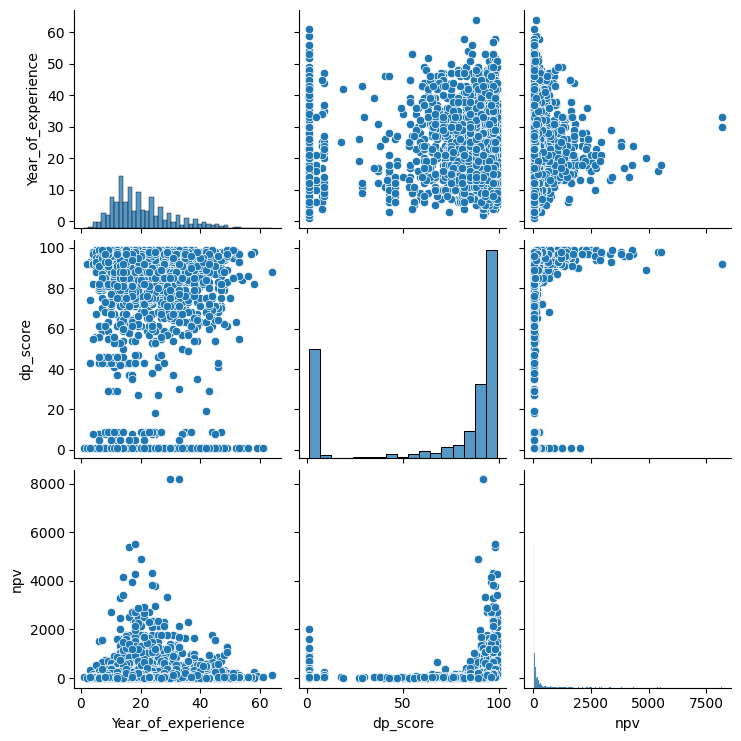

In [ ]:
sns.pairplot(df[num])

In [51]:
new=encoded_df.copy()
new

,Speciality,Year_of_experience,Location,City,dp_score,npv,consultation_fee,BDS,FICOI,DDV,DOMS,MOrth,MBBS,FRCPCH,BSc,FAICO,MRCPsych,FCPS,DNHE,PGCE,DVD,BHMS,BAMS,Diploma,DO,FICS,FNB,DGO,MD,MRCOG,DHMS,MSc,MRCS,MPhil,CCT,FRCP,FRCOG,MRCP,CCST,DDVL,MNAMS,MS,BPTh,DNB,Venereology,MPTh,FACC,MDS,FRACP,DPM,PG,DM,PhD,VD,FRCS,FCPS,MCh,FCCP,DMD
0,Cardiologist,19.0,"Hebbal,",Bangalore,1,46,1000,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,Cardiologist,21.0,"Old Airport Road,",Bangalore,91,89,1100,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2,Cardiologist,20.0,"Hebbal,",Bangalore,67,12,1000,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,Cardiologist,35.0,"Seshadripuram,",Bangalore,91,23,950,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,Cardiologist,7.0,"Whitefield,",Bangalore,91,23,900,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3201,Bariatric,31.0,"Powai,",Mumbai,95,111,1500,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3202,Bariatric,17.0,"Chembur,",Mumbai,94,106,1500,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3203,Bariatric,37.0,"Chembur,",Mumbai,96,26,1500,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3204,Bariatric,27.0,"Mulund West,",Mumbai,89,18,1000,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
df=new

<ipython-input-52-8df7bcac526d>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

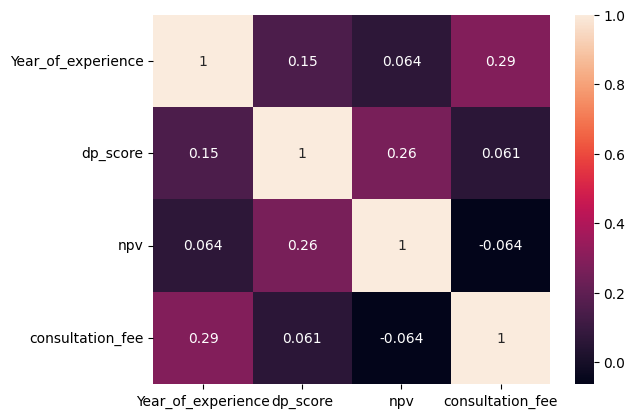

In [52]:
sns.heatmap(df.corr(),annot=True)

In [53]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder

In [54]:
sc = StandardScaler()

In [55]:
df[num] = sc.fit_transform(df[num])

In [56]:
sc.fit_transform(encoded_df[encoded_df_num])

array([[ 0.10591479, -1.45010246,  0.15345495],
       [ 0.35277981,  0.71663703,  1.61625354],
       [ 0.2293473 ,  0.13883984, -1.00317648],
       ...,
       [ 2.32769995,  0.83701145, -0.52691648],
       [ 1.09337486,  0.66848727, -0.79906505],
       [-0.14095022, -1.45010246,  0.15345495]])

In [57]:
encoded_df[encoded_df_num]=sc.fit_transform(encoded_df[encoded_df_num])

In [58]:
encoded_df

,Speciality,Year_of_experience,Location,City,dp_score,npv,consultation_fee,BDS,FICOI,DDV,DOMS,MOrth,MBBS,FRCPCH,BSc,FAICO,MRCPsych,FCPS,DNHE,PGCE,DVD,BHMS,BAMS,Diploma,DO,FICS,FNB,DGO,MD,MRCOG,DHMS,MSc,MRCS,MPhil,CCT,FRCP,FRCOG,MRCP,CCST,DDVL,MNAMS,MS,BPTh,DNB,Venereology,MPTh,FACC,MDS,FRACP,DPM,PG,DM,PhD,VD,FRCS,FCPS,MCh,FCCP,DMD
0,Cardiologist,0.105915,"Hebbal,",Bangalore,-1.450102,0.153455,1000,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,Cardiologist,0.352780,"Old Airport Road,",Bangalore,0.716637,1.616254,1100,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2,Cardiologist,0.229347,"Hebbal,",Bangalore,0.138840,-1.003176,1000,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,Cardiologist,2.080835,"Seshadripuram,",Bangalore,0.716637,-0.628972,950,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,Cardiologist,-1.375275,"Whitefield,",Bangalore,0.716637,-0.628972,900,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3201,Bariatric,1.587105,"Powai,",Mumbai,0.812937,2.364662,1500,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3202,Bariatric,-0.140950,"Chembur,",Mumbai,0.788862,2.194569,1500,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3203,Bariatric,2.327700,"Chembur,",Mumbai,0.837011,-0.526916,1500,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3204,Bariatric,1.093375,"Mulund West,",Mumbai,0.668487,-0.799065,1000,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [59]:
transform_types=encoded_df.columns.to_list()
transform_types

['Speciality',
 'Year_of_experience',
 'Location',
 'City',
 'dp_score',
 'npv',
 'consultation_fee',
 'BDS',
 'FICOI',
 'DDV',
 'DOMS',
 'MOrth',
 'MBBS',
 'FRCPCH',
 'BSc',
 'FAICO',
 'MRCPsych',
 'FCPS',
 'DNHE',
 'PGCE',
 'DVD',
 'BHMS',
 'BAMS',
 'Diploma',
 'DO',
 'FICS',
 'FNB',
 'DGO',
 'MD',
 'MRCOG',
 'DHMS',
 'MSc',
 'MRCS',
 'MPhil',
 'CCT',
 'FRCP',
 'FRCOG',
 'MRCP',
 'CCST',
 'DDVL',
 'MNAMS',
 'MS',
 'BPTh',
 'DNB',
 'Venereology',
 'MPTh',
 'FACC',
 'MDS',
 'FRACP',
 'DPM',
 'PG',
 'DM',
 'PhD',
 'VD',
 'FRCS',
 'FCPS ',
 'MCh',
 'FCCP',
 'DMD']

In [60]:
transform_types.remove('Speciality')
transform_types.remove('City')


In [61]:
transform_types.remove('Location')

In [62]:
for i in transform_types:
  encoded_df[i]=encoded_df[i].astype('float64')

In [63]:
encoded_df[encoded_df_cat]

,Speciality,City,Location
0,Cardiologist,Bangalore,"Hebbal,"
1,Cardiologist,Bangalore,"Old Airport Road,"
2,Cardiologist,Bangalore,"Hebbal,"
3,Cardiologist,Bangalore,"Seshadripuram,"
4,Cardiologist,Bangalore,"Whitefield,"
...,...,...,...
3201,Bariatric,Mumbai,"Powai,"
3202,Bariatric,Mumbai,"Chembur,"
3203,Bariatric,Mumbai,"Chembur,"
3204,Bariatric,Mumbai,"Mulund West,"


In [64]:
df[num]

,Year_of_experience,dp_score,npv
0,0.105915,-1.450102,0.153455
1,0.352780,0.716637,1.616254
2,0.229347,0.138840,-1.003176
3,2.080835,0.716637,-0.628972
4,-1.375275,0.716637,-0.628972
...,...,...,...
3201,1.587105,0.812937,2.364662
3202,-0.140950,0.788862,2.194569
3203,2.327700,0.837011,-0.526916
3204,1.093375,0.668487,-0.799065


In [65]:
cat

['City', 'Speciality', 'Degree']

In [66]:
encoder = OneHotEncoder(sparse=False)


# Fit and transform the data
#encoded_data = encoder.fit_transform(df[cat])
encoded_data_df=encoder.fit_transform(encoded_df[encoded_df_cat])
encoded_data = pd.DataFrame(encoded_data_df, columns=encoder.get_feature_names_out(encoded_df_cat))

encoded_data


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,Speciality_Bariatric,Speciality_Cardiologist,Speciality_Chiropractor,Speciality_Dentist,Speciality_Dermatologist,Speciality_Dietitian,Speciality_Gastroenterologist,Speciality_Gynecologist,Speciality_Infertility Specialist,Speciality_Neurologist,Speciality_Neurosurgeon,Speciality_Ophthalmologist,Speciality_Orthopedist,Speciality_Pediatrician,Speciality_Physiotherapist,Speciality_Psychiatrist,Speciality_Pulmonologist,Speciality_Rheumatologists,Speciality_Urologist,City_Bangalore,City_Delhi,City_Mumbai,"Location_AECS Layout,","Location_Akshaya nagar,","Location_Anand Niketan,","Location_Anand Vihar,","Location_Andheri East,","Location_Andheri West,","Location_Andheri,","Location_Ansari Nagar,","Location_Arekere,","Location_Ashok Vihar Phase 1,","Location_Ashok Vihar,","Location_Ashoknagar,","Location_Avalahalli,","Location_Azadpur,","Location_BEL Layout,","Location_BTM Layout 1st Stage,","Location_BTM Layout 2nd Stage,","Location_BTM Layout,","Location_Bali Nagar,","Location_Banashankari 1st Stage,","Location_Banashankari 2nd Stage,","Location_Banashankari 3rd Stage,","Location_Banashankari,","Location_Banaswadi,","Location_Bandra East,","Location_Bandra West,","Location_Bannerghatta Road,","Location_Basavanagudi,","Location_Basaveshwaranagar,","Location_Begur,","Location_Belathur,","Location_Bellandur,","Location_Bhandup West,","Location_Bhandup,","Location_Bhattarahalli,","Location_Bhogal,","Location_Bilekahalli,","Location_Bommanahalli,","Location_Borivali East,","Location_Borivali West,","Location_Borivali,","Location_Burari,","Location_CR Park,","Location_CV Raman Nagar,","Location_Chamarajpet,","Location_Chandivali,","Location_Chandra Layout,","Location_Charni Road,","Location_Chattarpur,","Location_Chembur East,","Location_Chembur West,","Location_Chembur,","Location_Chinchpokli,","Location_Chira Bazaar,","Location_Chirag Delhi,","Location_Chitra Vihar,","Location_Colaba,","Location_Connaught Place,","Location_Cuffe Parade,","Location_Cumballa Hill,","Location_DLF Newtown,","Location_Dadar West,","Location_Dadar,","Location_Dahisar East,","Location_Dahisar,","Location_Dasarahalli,","Location_Defence Colony,","Location_Delhi,","Location_Dilshad Garden,","Location_Doddakammanahalli,","Location_Domlur,","Location_Dwarka Sector 11,","Location_Dwarka Sector 12,","Location_Dwarka Sector 13,","Location_Dwarka Sector 19,","Location_Dwarka Sector 22,","Location_Dwarka Sector 23,","Location_Dwarka Sector 3,","Location_Dwarka Sector 6,","Location_Dwarka Sector 7,","Location_Dwarka Sector 8,","Location_Dwarka Sector 9,","Location_Dwarka,","Location_East Of Kailash,","Location_Electronics City,","Location_Gamdevi,","Location_Ghatkopar East,","Location_Ghatkopar West,","Location_Ghatkopar,","Location_Ghitorni,","Location_Girgaon,","Location_Goregaon East,","Location_Goregaon West,","Location_Goregaon,","Location_Grant Road,","Location_Greater Kailash Part 1,","Location_Greater Kailash Part 2,","Location_Green Park,","Location_Gubbalala,","Location_Gulabi Bagh,","Location_Gunjur,","Location_HAL 3rd Stage,","Location_HBR Layout,","Location_HRBR Layout,","Location_HSR Layout,","Location_Harlur,","Location_Harsh Vihar,","Location_Hauz Khas,","Location_Hazrat Nizamuddin,","Location_Hebbal Kempapura,","Location_Hebbal,","Location_Hegde Nagar,","Location_Hennur,","Location_Hongasandra,","Location_Hoodi,","Location_Horamavu,","Location_Hosur Road,","Location_Hulimavu,","Location_IP Extension,","Location_Indiranagar,","Location_JB Nagar,","Location_JP Nagar 1 Phase,","Location_JP Nagar 3 Phase,","Location_JP Nagar 4 Phase,","Location_JP Nagar 6 Phase,","Location_JP Nagar 7 Phase,","Location_JP Nagar 8 Phase,","Location_JP Nagar 9 Phase,","Location_JP Nagar,","Location_Jagriti Enclave,","Location_Janakpuri,","Location_Jangpura,","Location_Jasola,","Location_Jayanagar 2 Block,","Location_Jayanagar 3 Block,","Location_Jayanagar 4 Block,","Location_Jayanagar 5 Block,","Location_Jayanagar 8 Block,","Location_Jayanagar 9 Block,","Location_Jayanagar,"

In [ ]:
City="Mumbai"
Spec="Bariatric"

encoder.transform([[City,Spec]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but OneHotEncoder was fitted with feature names
  warnings.warn(


array([[0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0.]])

In [67]:
encoded_df.columns

Index(['Speciality', 'Year_of_experience', 'Location', 'City', 'dp_score',
       'npv', 'consultation_fee', 'BDS', 'FICOI', 'DDV', 'DOMS', 'MOrth',
       'MBBS', 'FRCPCH', 'BSc', 'FAICO', 'MRCPsych', 'FCPS', 'DNHE', 'PGCE',
       'DVD', 'BHMS', 'BAMS', 'Diploma', 'DO', 'FICS', 'FNB', 'DGO', 'MD',
       'MRCOG', 'DHMS', 'MSc', 'MRCS', 'MPhil', 'CCT', 'FRCP', 'FRCOG', 'MRCP',
       'CCST', 'DDVL', 'MNAMS', 'MS', 'BPTh', 'DNB', 'Venereology', 'MPTh',
       'FACC', 'MDS', 'FRACP', 'DPM', 'PG', 'DM', 'PhD', 'VD', 'FRCS', 'FCPS ',
       'MCh', 'FCCP', 'DMD'],
      dtype='object')

In [68]:
encoded_df.dtypes

Speciality             object
Year_of_experience    float64
Location               object
City                   object
dp_score              float64
npv                   float64
consultation_fee      float64
BDS                   float64
FICOI                 float64
DDV                   float64
DOMS                  float64
MOrth                 float64
MBBS                  float64
FRCPCH                float64
BSc                   float64
FAICO                 float64
MRCPsych              float64
FCPS                  float64
DNHE                  float64
PGCE                  float64
DVD                   float64
BHMS                  float64
BAMS                  float64
Diploma               float64
DO                    float64
FICS                  float64
FNB                   float64
DGO                   float64
MD                    float64
MRCOG                 float64
DHMS                  float64
MSc                   float64
MRCS                  float64
MPhil     

In [69]:
encoded_data.dtypes

Speciality_Bariatric            float64
Speciality_Cardiologist         float64
Speciality_Chiropractor         float64
Speciality_Dentist              float64
Speciality_Dermatologist        float64
                                 ...   
Location_Worli,                 float64
Location_Yelahanka New Town,    float64
Location_Yelahanka,             float64
Location_Yelenahalli,           float64
Location_Yeshwanthpur,          float64
Length: 378, dtype: object

In [70]:
encoded_df.shape

(3206, 59)

In [71]:
num=encoded_df.select_dtypes("number").columns.to_list()
num

['Year_of_experience',
 'dp_score',
 'npv',
 'consultation_fee',
 'BDS',
 'FICOI',
 'DDV',
 'DOMS',
 'MOrth',
 'MBBS',
 'FRCPCH',
 'BSc',
 'FAICO',
 'MRCPsych',
 'FCPS',
 'DNHE',
 'PGCE',
 'DVD',
 'BHMS',
 'BAMS',
 'Diploma',
 'DO',
 'FICS',
 'FNB',
 'DGO',
 'MD',
 'MRCOG',
 'DHMS',
 'MSc',
 'MRCS',
 'MPhil',
 'CCT',
 'FRCP',
 'FRCOG',
 'MRCP',
 'CCST',
 'DDVL',
 'MNAMS',
 'MS',
 'BPTh',
 'DNB',
 'Venereology',
 'MPTh',
 'FACC',
 'MDS',
 'FRACP',
 'DPM',
 'PG',
 'DM',
 'PhD',
 'VD',
 'FRCS',
 'FCPS ',
 'MCh',
 'FCCP',
 'DMD']

In [72]:
new_df=pd.concat([encoded_df[num],encoded_data],axis=1)
new_df

,Year_of_experience,dp_score,npv,consultation_fee,BDS,FICOI,DDV,DOMS,MOrth,MBBS,FRCPCH,BSc,FAICO,MRCPsych,FCPS,DNHE,PGCE,DVD,BHMS,BAMS,Diploma,DO,FICS,FNB,DGO,MD,MRCOG,DHMS,MSc,MRCS,MPhil,CCT,FRCP,FRCOG,MRCP,CCST,DDVL,MNAMS,MS,BPTh,DNB,Venereology,MPTh,FACC,MDS,FRACP,DPM,PG,DM,PhD,VD,FRCS,FCPS,MCh,FCCP,DMD,Speciality_Bariatric,Speciality_Cardiologist,Speciality_Chiropractor,Speciality_Dentist,Speciality_Dermatologist,Speciality_Dietitian,Speciality_Gastroenterologist,Speciality_Gynecologist,Speciality_Infertility Specialist,Speciality_Neurologist,Speciality_Neurosurgeon,Speciality_Ophthalmologist,Speciality_Orthopedist,Speciality_Pediatrician,Speciality_Physiotherapist,Speciality_Psychiatrist,Speciality_Pulmonologist,Speciality_Rheumatologists,Speciality_Urologist,City_Bangalore,City_Delhi,City_Mumbai,"Location_AECS Layout,","Location_Akshaya nagar,","Location_Anand Niketan,","Location_Anand Vihar,","Location_Andheri East,","Location_Andheri West,","Location_Andheri,","Location_Ansari Nagar,","Location_Arekere,","Location_Ashok Vihar Phase 1,","Location_Ashok Vihar,","Location_Ashoknagar,","Location_Avalahalli,","Location_Azadpur,","Location_BEL Layout,","Location_BTM Layout 1st Stage,","Location_BTM Layout 2nd Stage,","Location_BTM Layout,","Location_Bali Nagar,","Location_Banashankari 1st Stage,","Location_Banashankari 2nd Stage,","Location_Banashankari 3rd Stage,","Location_Banashankari,","Location_Banaswadi,","Location_Bandra East,","Location_Bandra West,","Location_Bannerghatta Road,","Location_Basavanagudi,","Location_Basaveshwaranagar,","Location_Begur,","Location_Belathur,","Location_Bellandur,","Location_Bhandup West,","Location_Bhandup,","Location_Bhattarahalli,","Location_Bhogal,","Location_Bilekahalli,","Location_Bommanahalli,","Location_Borivali East,","Location_Borivali West,","Location_Borivali,","Location_Burari,","Location_CR Park,","Location_CV Raman Nagar,","Location_Chamarajpet,","Location_Chandivali,","Location_Chandra Layout,","Location_Charni Road,","Location_Chattarpur,","Location_Chembur East,","Location_Chembur West,","Location_Chembur,","Location_Chinchpokli,","Location_Chira Bazaar,","Location_Chirag Delhi,","Location_Chitra Vihar,","Location_Colaba,","Location_Connaught Place,","Location_Cuffe Parade,","Location_Cumballa Hill,","Location_DLF Newtown,","Location_Dadar West,","Location_Dadar,","Location_Dahisar East,","Location_Dahisar,","Location_Dasarahalli,","Location_Defence Colony,","Location_Delhi,","Location_Dilshad Garden,","Location_Doddakammanahalli,","Location_Domlur,","Location_Dwarka Sector 11,","Location_Dwarka Sector 12,","Location_Dwarka Sector 13,","Location_Dwarka Sector 19,","Location_Dwarka Sector 22,","Location_Dwarka Sector 23,","Location_Dwarka Sector 3,","Location_Dwarka Sector 6,","Location_Dwarka Sector 7,","Location_Dwarka Sector 8,","Location_Dwarka Sector 9,","Location_Dwarka,","Location_East Of Kailash,","Location_Electronics City,","Location_Gamdevi,","Location_Ghatkopar East,","Location_Ghatkopar West,","Location_Ghatkopar,","Location_Ghitorni,","Location_Girgaon,","Location_Goregaon East,","Location_Goregaon West,","Location_Goregaon,","Location_Grant Road,","Location_Greater Kailash Part 1,","Location_Greater Kailash Part 2,","Location_Green Park,","Location_Gubbalala,","Location_Gulabi Bagh,","Location_Gunjur,","Location_HAL 3rd Stage,","Location_HBR Layout,","Location_HRBR Layout,","Location_HSR Layout,","Location_Harlur,","Location_Harsh Vihar,","Location_Hauz Khas,","Location_Hazrat Nizamuddin,","Location_Hebbal Kempapura,","Location_Hebbal,","Location_Hegde Nagar,","Location_Hennur,","Location_Hongasandra,","Location_Hoodi,","Location_Horamavu,","Location_Hosur Road,","Location_Hulimavu,","Location_IP Extension,","Location_Indiranagar,","Location_JB Nagar,","Location_JP Nagar 1 Phase,","Location_JP Nagar 3 Phase,","Location_JP Nagar 4 Phase,","Location_JP Nagar 6 Phase,","Location_JP Nagar 7 Phase,","Location_JP Nagar 8 Phase,","Location_JP Nagar 9 Phase,","Loca

In [73]:
new_df.head()

,Year_of_experience,dp_score,npv,consultation_fee,BDS,FICOI,DDV,DOMS,MOrth,MBBS,FRCPCH,BSc,FAICO,MRCPsych,FCPS,DNHE,PGCE,DVD,BHMS,BAMS,Diploma,DO,FICS,FNB,DGO,MD,MRCOG,DHMS,MSc,MRCS,MPhil,CCT,FRCP,FRCOG,MRCP,CCST,DDVL,MNAMS,MS,BPTh,DNB,Venereology,MPTh,FACC,MDS,FRACP,DPM,PG,DM,PhD,VD,FRCS,FCPS,MCh,FCCP,DMD,Speciality_Bariatric,Speciality_Cardiologist,Speciality_Chiropractor,Speciality_Dentist,Speciality_Dermatologist,Speciality_Dietitian,Speciality_Gastroenterologist,Speciality_Gynecologist,Speciality_Infertility Specialist,Speciality_Neurologist,Speciality_Neurosurgeon,Speciality_Ophthalmologist,Speciality_Orthopedist,Speciality_Pediatrician,Speciality_Physiotherapist,Speciality_Psychiatrist,Speciality_Pulmonologist,Speciality_Rheumatologists,Speciality_Urologist,City_Bangalore,City_Delhi,City_Mumbai,"Location_AECS Layout,","Location_Akshaya nagar,","Location_Anand Niketan,","Location_Anand Vihar,","Location_Andheri East,","Location_Andheri West,","Location_Andheri,","Location_Ansari Nagar,","Location_Arekere,","Location_Ashok Vihar Phase 1,","Location_Ashok Vihar,","Location_Ashoknagar,","Location_Avalahalli,","Location_Azadpur,","Location_BEL Layout,","Location_BTM Layout 1st Stage,","Location_BTM Layout 2nd Stage,","Location_BTM Layout,","Location_Bali Nagar,","Location_Banashankari 1st Stage,","Location_Banashankari 2nd Stage,","Location_Banashankari 3rd Stage,","Location_Banashankari,","Location_Banaswadi,","Location_Bandra East,","Location_Bandra West,","Location_Bannerghatta Road,","Location_Basavanagudi,","Location_Basaveshwaranagar,","Location_Begur,","Location_Belathur,","Location_Bellandur,","Location_Bhandup West,","Location_Bhandup,","Location_Bhattarahalli,","Location_Bhogal,","Location_Bilekahalli,","Location_Bommanahalli,","Location_Borivali East,","Location_Borivali West,","Location_Borivali,","Location_Burari,","Location_CR Park,","Location_CV Raman Nagar,","Location_Chamarajpet,","Location_Chandivali,","Location_Chandra Layout,","Location_Charni Road,","Location_Chattarpur,","Location_Chembur East,","Location_Chembur West,","Location_Chembur,","Location_Chinchpokli,","Location_Chira Bazaar,","Location_Chirag Delhi,","Location_Chitra Vihar,","Location_Colaba,","Location_Connaught Place,","Location_Cuffe Parade,","Location_Cumballa Hill,","Location_DLF Newtown,","Location_Dadar West,","Location_Dadar,","Location_Dahisar East,","Location_Dahisar,","Location_Dasarahalli,","Location_Defence Colony,","Location_Delhi,","Location_Dilshad Garden,","Location_Doddakammanahalli,","Location_Domlur,","Location_Dwarka Sector 11,","Location_Dwarka Sector 12,","Location_Dwarka Sector 13,","Location_Dwarka Sector 19,","Location_Dwarka Sector 22,","Location_Dwarka Sector 23,","Location_Dwarka Sector 3,","Location_Dwarka Sector 6,","Location_Dwarka Sector 7,","Location_Dwarka Sector 8,","Location_Dwarka Sector 9,","Location_Dwarka,","Location_East Of Kailash,","Location_Electronics City,","Location_Gamdevi,","Location_Ghatkopar East,","Location_Ghatkopar West,","Location_Ghatkopar,","Location_Ghitorni,","Location_Girgaon,","Location_Goregaon East,","Location_Goregaon West,","Location_Goregaon,","Location_Grant Road,","Location_Greater Kailash Part 1,","Location_Greater Kailash Part 2,","Location_Green Park,","Location_Gubbalala,","Location_Gulabi Bagh,","Location_Gunjur,","Location_HAL 3rd Stage,","Location_HBR Layout,","Location_HRBR Layout,","Location_HSR Layout,","Location_Harlur,","Location_Harsh Vihar,","Location_Hauz Khas,","Location_Hazrat Nizamuddin,","Location_Hebbal Kempapura,","Location_Hebbal,","Location_Hegde Nagar,","Location_Hennur,","Location_Hongasandra,","Location_Hoodi,","Location_Horamavu,","Location_Hosur Road,","Location_Hulimavu,","Location_IP Extension,","Location_Indiranagar,","Location_JB Nagar,","Location_JP Nagar 1 Phase,","Location_JP Nagar 3 Phase,","Location_JP Nagar 4 Phase,","Location_JP Nagar 6 Phase,","Location_JP Nagar 7 Phase,","Location_JP Nagar 8 Phase,","Location_JP Nagar 9 Phase,","Loca

In [74]:
new_df.columns

Index(['Year_of_experience', 'dp_score', 'npv', 'consultation_fee', 'BDS',
       'FICOI', 'DDV', 'DOMS', 'MOrth', 'MBBS',
       ...
       'Location_Vinayaka Nagar,', 'Location_Vishwas Nagar,',
       'Location_Wadala,', 'Location_Walkeshwar,', 'Location_Whitefield,',
       'Location_Worli,', 'Location_Yelahanka New Town,',
       'Location_Yelahanka,', 'Location_Yelenahalli,',
       'Location_Yeshwanthpur,'],
      dtype='object', length=434)

In [75]:
new_df.shape

(3206, 434)

In [ ]:
#new_df.to_csv('/content/drive/MyDrive/Proco Project/Final_Encoded_Data.csv')

In [76]:
new_df.to_excel('/content/drive/MyDrive/Proco Project/Final_intermediate_table.xlsx')

# New Section